# Proyecto Accidentes gestionados por la Guardia Urbana 2014 - 2024

## Carga de archivos y resumen de Dataframes cargados (filas y columnas)

In [2]:
import pandas as pd
import os

data_folder = '/Users/mac/Desktop/Proyecto_siniestralidad_barcelona/Datasets corregidos'
dataframes = {}

# Incluir desde 2014 hasta 2024
for year in range(2014, 2025):
     # Usamos .xlsx solo para 2016, el resto son .xls
    extension = 'xlsx' if year == 2016 else 'xls'
    file_name = f"Copia de {year}_accidents_gu_bcn.{extension}"
    file_path = os.path.join(data_folder, file_name)

    try:
        df = pd.read_excel(file_path)
        dataframes[year] = df
        print(f"✅ '{file_name}' cargado correctamente.")
    except FileNotFoundError:
        print(f"❌ ERROR: El archivo '{file_name}' no se encontró en '{data_folder}'.")
    except Exception as e:
        print(f"❌ ERROR al cargar '{file_name}': {e}")

print("\n--- 📊 Resumen de DataFrames cargados ---")
for year, df in dataframes.items():
    print(f"Año {year}: {len(df)} filas, {len(df.columns)} columnas")

✅ 'Copia de 2014_accidents_gu_bcn.xls' cargado correctamente.
✅ 'Copia de 2015_accidents_gu_bcn.xls' cargado correctamente.
✅ 'Copia de 2016_accidents_gu_bcn.xlsx' cargado correctamente.
✅ 'Copia de 2017_accidents_gu_bcn.xls' cargado correctamente.
✅ 'Copia de 2018_accidents_gu_bcn.xls' cargado correctamente.
✅ 'Copia de 2019_accidents_gu_bcn.xls' cargado correctamente.
✅ 'Copia de 2020_accidents_gu_bcn.xls' cargado correctamente.
✅ 'Copia de 2021_accidents_gu_bcn.xls' cargado correctamente.
✅ 'Copia de 2022_accidents_gu_bcn.xls' cargado correctamente.
✅ 'Copia de 2023_accidents_gu_bcn.xls' cargado correctamente.
✅ 'Copia de 2024_accidents_gu_bcn.xls' cargado correctamente.

--- 📊 Resumen de DataFrames cargados ---
Año 2014: 9678 filas, 25 columnas
Año 2015: 10008 filas, 25 columnas
Año 2016: 10119 filas, 25 columnas
Año 2017: 10312 filas, 25 columnas
Año 2018: 9936 filas, 25 columnas
Año 2019: 10027 filas, 25 columnas
Año 2020: 6268 filas, 25 columnas
Año 2021: 7659 filas, 23 columnas

# Limpieza de datos

In [3]:
# Comprobación nombre de columnas para unificarlos

print("\n--- 🔎 Nombres de columnas por año ---")
for year, df in dataframes.items():
    print(f"\n📅 Año {year} ({len(df.columns)} columnas):")
    print(list(df.columns))


--- 🔎 Nombres de columnas por año ---

📅 Año 2014 (25 columnas):
["N˙mero d'expedient", 'Codi districte', 'Nom districte', 'NK barri', 'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption', 'DescripciÛ dia setmana', 'Dia de setmana', 'DescripciÛ tipus dia', 'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia', 'DescripciÛ torn', 'DescripciÛ causa vianant', 'N˙mero de morts', 'N˙mero de lesionats lleus', 'N˙mero de lesionats greus', 'N˙mero de vÌctimes', 'N˙mero de vehicles implicats', 'Longitud', 'Latitud']

📅 Año 2015 (25 columnas):
['N˙mero d expedient', 'Codi districte', 'Nom districte', 'Codi barri', 'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption', 'DescripciÛ dia setmana', 'Dia setmana', 'DescripciÛ tipus dia', 'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia', 'DescripciÛ torn', 'DescripciÛ causa vianant', 'N˙mero de morts', 'N˙mero de lesionats lleus', 'N˙mero de lesionats greus', 'N˙mero de vÌctimes', 'N˙mero de vehicles implicats

In [4]:
# Limpieza y estandarización de nombre de columnas:

def limpiar_y_estandarizar_columnas(df, year):
    df = df.copy()
    
    # Eliminar espacios extra y caracteres extraños en nombres de columnas
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("'", "").str.replace("`", "")

    # Normalización por año (algunos tienen nombres muy diferentes)
    renombrar = {}

    if year in [2014, 2015]:
        renombrar = {
            "N˙mero_d'expedient": "Numero_expedient",
            "N˙mero_d_expedient": "Numero_expedient",
            "Codi_districte": "Codi_districte",
            "Nom_districte": "Nom_districte",
            "Codi_barri": "Codi_barri",
            "NK_barri": "Codi_barri",
            "Nom_barri": "Nom_barri",
            "Codi_carrer": "Codi_carrer",
            "Nom_carrer": "Nom_carrer",
            "Num_postal_caption": "Num_postal",
            "DescripciÛ_dia_setmana": "Descripcio_dia_setmana",
            "Dia_de_setmana": "Dia_setmana",
            "Dia_setmana": "Dia_setmana",
            "DescripciÛ_tipus_dia": "Descripcio_tipus_dia",
            "NK_Any": "Any",
            "NK_Any": "Any",
            "Mes_de_any": "Mes_any",
            "Nom_mes": "Nom_mes",
            "Dia_de_mes": "Dia_mes",
            "Hora_de_dia": "Hora_dia",
            "DescripciÛ_torn": "Descripcio_torn",
            "DescripciÛ_causa_vianant": "Descripcio_causa_vianant",
            "N˙mero_de_morts": "Numero_morts",
            "N˙mero_de_lesionats_lleus": "Numero_lesionats_lleus",
            "N˙mero_de_lesionats_greus": "Numero_lesionats_greus",
            "N˙mero_de_vÌctimes": "Numero_victimes",
            "N˙mero_de_vehicles_implicats": "Numero_vehicles_implicats"
        }

    # Para todos los años: estandarizar variantes comunes
    renombrar.update({
        "Num_postal_caption": "Num_postal",
        "Num_postal_": "Num_postal",
        "NK_Any": "Any",
        "Mes_de_any": "Mes_any",
        "Dia_de_mes": "Dia_mes",
        "Hora_de_dia": "Hora_dia"
    })

    df.rename(columns=renombrar, inplace=True)

    # Eliminar columnas que son duplicadas o innecesarias para análisis
    columnas_a_eliminar = ['Dia_setmana', 'Descripcio_tipus_dia']
    for col in columnas_a_eliminar:
        if col in df.columns:
            df.drop(columns=col, inplace=True)

    return df

# Aplicamos la función a todos los años
for year in dataframes:
    dataframes[year] = limpiar_y_estandarizar_columnas(dataframes[year], year)

# Comprobamos si ya están unificadas
print("\n---  Columnas tras estandarización ---")
columnas_referencia = set(dataframes[2014].columns)
for year, df in dataframes.items():
    columnas_actuales = set(df.columns)
    diferencia = columnas_actuales.symmetric_difference(columnas_referencia)
    print(f"Año {year}: {len(df.columns)} columnas", end=' ')
    if diferencia:
        print(f"⚠️ Diferencias: {diferencia}")
    else:
        print("✅ Coinciden")



---  Columnas tras estandarización ---
Año 2014: 23 columnas ✅ Coinciden
Año 2015: 23 columnas ⚠️ Diferencias: {'Numero_expedient', 'N˙mero_dexpedient'}
Año 2016: 23 columnas ⚠️ Diferencias: {'Numero_expedient', 'N˙mero_dexpedient'}
Año 2017: 23 columnas ⚠️ Diferencias: {'Numero_expedient', 'N˙mero_dexpedient'}
Año 2018: 23 columnas ⚠️ Diferencias: {'Numero_expedient', 'N˙mero_dexpedient'}
Año 2019: 23 columnas ⚠️ Diferencias: {'Numero_expedient', 'N˙mero_dexpedient'}
Año 2020: 23 columnas ⚠️ Diferencias: {'Numero_expedient', 'N˙mero_dexpedient'}
Año 2021: 23 columnas ⚠️ Diferencias: {'Numero_expedient', 'N˙mero_dexpedient'}
Año 2022: 23 columnas ⚠️ Diferencias: {'Numero_expedient', 'N˙mero_dexpedient'}
Año 2023: 23 columnas ⚠️ Diferencias: {'Numero_expedient', 'N˙mero_dexpedient'}
Año 2024: 23 columnas ⚠️ Diferencias: {'Numero_expedient', 'N˙mero_dexpedient'}


In [5]:
# Comprobación nombre de columnas tras la limpieza:

print("\n--- Nombres de columnas por año ---")
for year, df in dataframes.items():
    print(f"\n📅 Año {year} ({len(df.columns)} columnas):")
    print(list(df.columns))



--- Nombres de columnas por año ---

📅 Año 2014 (23 columnas):
['N˙mero_dexpedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal', 'Descripcio_dia_setmana', 'Any', 'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn', 'Descripcio_causa_vianant', 'Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Numero_victimes', 'Numero_vehicles_implicats', 'Longitud', 'Latitud']

📅 Año 2015 (23 columnas):
['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal', 'Descripcio_dia_setmana', 'Any', 'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn', 'Descripcio_causa_vianant', 'Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Numero_victimes', 'Numero_vehicles_implicats', 'Longitud', 'Latitud']

📅 Año 2016 (23 columnas):
['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', 'Codi_carrer', 'No

In [6]:
# Antes de concatenar en un df definitivo, voy a visualizar los datos de cada tabla

print("\n--- Primeras 5 filas de cada DataFrame por año ---")
for year, df in dataframes.items():
    print(f"\n📅 Año {year} — {len(df)} filas, {len(df.columns)} columnas:")
    display(df.head(5)) 



--- Primeras 5 filas de cada DataFrame por año ---

📅 Año 2014 — 9678 filas, 23 columnas:


,N˙mero_dexpedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2014S003380,10,Sant MartÌ,101-10-64,el Camp de l'Arpa del Clot,209900,Meridiana,0163 0163,Dijous,2014,...,13,Matí,No causa del vianant,0,1,0,1,2,2.187671,41.414333
1,2014S002456,10,Sant MartÌ,101-10-64,el Camp de l'Arpa del Clot,134801,Freser,0101 0101,Dijous,2014,...,10,Matí,No causa del vianant,0,1,0,1,1,2.183898,41.418254
2,2014S006504,10,Sant MartÌ,101-10-64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0358 0358,Dimecres,2014,...,14,Tarda,No causa del vianant,0,2,0,2,2,2.182583,41.418257
3,2014S003469,10,Sant MartÌ,101-10-64,el Camp de l'Arpa del Clot,90502,CÚrsega,0711 0711,Dilluns,2014,...,8,Matí,No causa del vianant,0,1,0,1,2,2.182063,41.415123
4,2014S003302,10,Sant MartÌ,101-10-64,el Camp de l'Arpa del Clot,194406,Maragall,0029 0031,Dilluns,2014,...,17,Tarda,No causa del vianant,0,1,0,1,2,2.181705,41.416671



📅 Año 2015 — 10008 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2015S007685,10.0,Sant MartÌ,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,0208 0208,Dimarts,2015.0,...,19.0,Tarda,Desobeir el senyal del sem‡for,0.0,1.0,0.0,1.0,1.0,2.183659,41.417445
1,2015S001364,10.0,Sant MartÌ,64.0,el Camp de l'Arpa del Clot,161407.0,Ind˙stria,0336 0336,Dissabte,2015.0,...,21.0,Tarda,No causa del vianant,0.0,1.0,0.0,1.0,1.0,2.185253,41.418674
2,2015S004325,10.0,Sant MartÌ,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,0343 0343,Divendres,2015.0,...,9.0,Matí,No causa del vianant,0.0,1.0,0.0,1.0,2.0,2.185644,41.418764
3,2015S005540,10.0,Sant MartÌ,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,0032 0034,Divendres,2015.0,...,20.0,Tarda,No causa del vianant,0.0,2.0,0.0,2.0,1.0,2.180706,41.415979
4,2015S002024,10.0,Sant MartÌ,64.0,el Camp de l'Arpa del Clot,194406.0,Maragall,0001 0003,Dimarts,2015.0,...,12.0,Matí,Desobeir el senyal del sem‡for,0.0,1.0,0.0,1.0,1.0,2.182126,41.415215



📅 Año 2016 — 10119 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2016S003848,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0293 0293,Dijous,2016,...,16,Tarda,No causa del vianant,0,1,0,1,2,2.186554,41.415388
1,2016S003418,10,Sant Martí,64,el Camp de l'Arpa del Clot,346402,Trinxant,0014 0014,Dimecres,2016,...,16,Tarda,No causa del vianant,0,1,0,1,2,2.186511,41.414045
2,2016S007530,10,Sant Martí,64,el Camp de l'Arpa del Clot,346402,Trinxant,0014 0014,Dimarts,2016,...,11,Matí,No causa del vianant,0,1,0,1,2,2.186511,41.414045
3,2016S001928,10,Sant Martí,64,el Camp de l'Arpa del Clot,134801,Freser,0236 0236,Dijous,2016,...,13,Matí,No causa del vianant,0,1,0,1,2,2.183526,41.417312
4,2016S004672,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0337 0337,Dimecres,2016,...,19,Tarda,Creuar per fora pas de vianants,0,2,0,2,1,2.184633,41.416833



📅 Año 2017 — 10312 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2017S004615,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa ...,0323 0325,Dijous,2017,...,14,Tarda,No causa del vianant,0,1,0,1,3,2.185272,41.416365
1,2017S007775,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,161407,Ind√∫stria / Trinxant ...,0320 0322,Dimecres,2017,...,12,Matí,No causa del vianant,0,1,0,1,2,2.183245,41.416336
2,2017S004484,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,161407,Trinxant / Ind√∫stria ...,0320 0322,Dissabte,2017,...,21,Tarda,No causa del vianant,0,1,0,1,2,2.183245,41.416336
3,2017S010680,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,161407,Ind√∫stria ...,0303 0303,Dimarts,2017,...,20,Tarda,No causa del vianant,0,2,0,2,1,2.183561,41.416372
4,2017S005152,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,161407,Ind√∫stria ...,0317 0317,Dilluns,2017,...,15,Tarda,Altres,0,1,0,1,1,2.184059,41.416763



📅 Año 2018 — 9936 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2018S000150,3,Sants-Montju√Øc,12,la Marina del Prat Vermell,701819,N√∫mero 3 Zona Franca / E Zona Franca ...,69-75,Dilluns,2018,...,7,Matí,No causa del vianant,0,1,0,1,2,2.129612,41.336163
1,2018S000761,3,Sants-Montju√Øc,11,el Poble-sec,234001,Ol√≠mpic ...,2025-07-05 00:00:00,Diumenge,2018,...,19,Tarda,No causa del vianant,0,0,0,0,2,2.152513,41.362326
2,2018S005151,3,Sants-Montju√Øc,12,la Marina del Prat Vermell,370531,A Zona Franca / N√∫mero 6 Zona Franca ...,NaN,Dimecres,2018,...,13,Matí,No causa del vianant,0,1,0,1,2,2.132817,41.323437
3,2018S000933,3,Sants-Montju√Øc,12,la Marina del Prat Vermell,701819,N√∫mero 3 Zona Franca / E ...,69-75,Diumenge,2018,...,7,Matí,No causa del vianant,0,2,0,2,1,2.130752,41.335490
4,2018S006926,3,Sants-Montju√Øc,12,la Marina del Prat Vermell,370203,N√∫mero 3 Zona Franca ...,77-111,Divendres,2018,...,6,Matí,No causa del vianant,0,0,0,0,2,2.124529,41.337668



📅 Año 2019 — 10027 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2019S000001,5,Sarri√†-Sant Gervasi,26,Sant Gervasi - Galvany,144601,Diagonal / Augusta ...,0482 0482,Dimarts,2019,...,1,Nit,No causa del vianant,0,0,1,1,1,2.155236,41.395744
1,2019S000002,9,Sant Andreu,62,el Congr√©s i els Indians,102907,Felip II / Congr√©s Eucar√≠stic ...,9999 9999,Dimarts,2019,...,4,Nit,No causa del vianant,0,1,0,1,2,2.179990,41.425361
2,2019S000003,10,Sant Mart√≠,66,el Parc i la Llacuna del Poblenou,242906,Pallars ...,0111 0113,Dimarts,2019,...,5,Nit,Creuar per fora pas de vianants,0,1,0,1,1,2.191712,41.396887
3,2019S000004,6,Gr√†cia,32,el Camp d'en Grassot i Gr√†cia Nova,228803,Taxdirt / Nogu√©s ...,0054 0054,Dimarts,2019,...,8,Matí,No causa del vianant,0,1,0,1,2,2.165429,41.408772
4,2019S000005,2,Eixample,7,la Dreta de l'Eixample,89004,Consell de Cent / Girona ...,0395 0397,Dimarts,2019,...,12,Matí,No causa del vianant,0,2,0,2,1,2.170440,41.394884



📅 Año 2020 — 6268 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2020S000001,7,Horta-Guinard√≥,72-7-36,la Font d'en Fargues,194406,Maragall,0353 0355,Dimecres,2020,...,0,Nit,Desconegut,0,0,0,0,1,2.167116,41.42747394
1,2020S000002,3,Sants-Montju√Øc,33-3-16,la Bordeta,169409,Corts Catalanes,0203 0203,Dimecres,2020,...,2,Nit,Desobeir el senyal del sem√†for,0,1,0,1,1,2.140650,41.368984627
2,2020S000003,2,Eixample,2008-02-23 00:00:00,l'Antiga Esquerra de l'Eixample,320704,Sarri√†,0018 0018,Dimecres,2020,...,2,Nit,Desconegut,0,2,0,2,2,2.144037,41.390563692
3,2020S000004,4,Les Corts,41-4-19,les Corts,101904,Doctor Fleming,0002 0002,Dimecres,2020,...,6,Matí,Desconegut,0,2,0,2,2,2.136808,41.391360941
4,2020S000005,2,Eixample,2007-02-24 00:00:00,la Dreta de l'Eixample,309406,Sant Pere,0029 0029,Dimecres,2020,...,4,Nit,Altres,0,1,0,1,1,2.175444,41.390126129



📅 Año 2021 — 7659 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2021S002939,-1,Desconegut,-1,Desconegut,-1,Corts Catalanes ...,Desconegut,Dijous,2021,...,9,Matí,No causa del vianant,0,1,0,1,2,2.134989,41.363897
1,2021S004839,-1,Desconegut,-1,Desconegut,-1,A Zona Franca ...,Desconegut,Divendres,2021,...,7,Matí,No causa del vianant,0,1,0,1,2,2.143178,41.340605
2,2021S000882,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,41507,Besal√∫,0064 0064,Divendres,2021,...,15,Tarda,No causa del vianant,0,8,0,8,2,2.184846,41.415196
3,2021S001565,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,209900,Meridiana,0181 0181,Divendres,2021,...,9,Matí,No causa del vianant,0,1,0,1,2,2.186575,41.413140
4,2021S001798,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0352 0354,Divendres,2021,...,8,Matí,No causa del vianant,0,1,0,1,2,2.180821,41.415920



📅 Año 2022 — 7999 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2022S007749,-1,Desconegut,-1,Desconegut,-1,Fernando Pessoa ...,17,Dilluns,2022,...,11,Matí,No causa del vianant,0,1,0,1,2,2.193098,41.439261
1,2022S003422,-1,Desconegut,-1,Desconegut,-1,Bac de Roda / Ramon Turr√≥ ...,Desconegut,Dissabte,2022,...,14,Tarda,No causa del vianant,0,2,0,2,2,2.208515,41.404080
2,2022S003346,-1,Desconegut,-1,Desconegut,-1,Viladrosa ...,97-103,Dimecres,2022,...,21,Tarda,No causa del vianant,0,1,0,1,2,2.176568,41.443596
3,2022S006073,-1,Desconegut,-1,Desconegut,-1,A Zona Franca / N√∫mero 3 Zona Franca ...,Desconegut,Dissabte,2022,...,21,Tarda,No causa del vianant,0,0,0,0,1,2.138671,41.332974
4,2022S005123,-1,Desconegut,-1,Desconegut,-1,Carles Pi i Sunyer ...,10,Divendres,2022,...,16,Tarda,No causa del vianant,0,1,0,1,2,2.173975,41.385209



📅 Año 2023 — 7724 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2023S000001,3,Sants-Montju√Øc,18,Sants,30602,Badal / C√†ceres ...,0186 0186,Diumenge,2023,...,10,Matí,No causa del vianant,0,0,1,1,1,2.130813,41.374565
1,2023S000002,7,Horta-Guinard√≥,33,el Baix Guinard√≥,109203,Encarnaci√≥ ...,0149 0149,Diumenge,2023,...,3,Nit,No causa del vianant,0,0,0,0,1,2.165513,41.409867
2,2023S000003,1,Ciutat Vella,1,el Raval,67307,Carme ...,0075 0079,Diumenge,2023,...,3,Nit,Creuar per fora pas de vianants,0,1,0,1,1,2.167452,41.380473
3,2023S000005,6,Gr√†cia,31,la Vila de Gr√†cia,282401,Riera de Sant Miquel / S√®neca ...,0017 0017,Diumenge,2023,...,17,Tarda,No causa del vianant,0,1,0,1,2,2.157161,41.397448
4,2023S000006,6,Gr√†cia,31,la Vila de Gr√†cia,206403,Gran de Gr√†cia / Gr√†cia ...,0072 0072,Diumenge,2023,...,17,Tarda,No causa del vianant,0,1,0,1,2,2.155459,41.399841



📅 Año 2024 — 7536 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2024S000001,9,Sant Andreu,57,la Trinitat Vella,701268,Dalt (Llobregat),K165,Dilluns,2024,...,2,Nit,NaN,NaN,2.0,NaN,2.0,1,2.194806,41.451076
1,2024S000002,2,Eixample,8,l'Antiga Esquerra de l'Eixample,144601,Diagonal,423-425,Dilluns,2024,...,3,Nit,NaN,NaN,1.0,NaN,1.0,2,2.152973,41.394633
2,2024S000003,2,Eixample,10,Sant Antoni,169409,Corts Catalanes,NaN,Dilluns,2024,...,4,Nit,NaN,NaN,4.0,1.0,5.0,2,2.159702,41.382984
3,2024S000004,1,Ciutat Vella,2,el Barri Gòtic,701498,B-10 (Besòs),K108,Dilluns,2024,...,5,Nit,NaN,1.0,2.0,1.0,4.0,1,2.178455,41.375568
4,2024S000005,4,Les Corts,19,les Corts,231502,Numància,NaN,Dilluns,2024,...,7,Matí,NaN,NaN,3.0,NaN,3.0,4,2.137166,41.385006


In [7]:
# Revisión de tipos de datos
print("\n--- 🧪 Tipos de datos por año ---")
año = 2014

df = dataframes[año]
print(f"\n📅 {año} ({len(df)} filas):")
print(df.dtypes)


--- 🧪 Tipos de datos por año ---

📅 2014 (9678 filas):
N˙mero_dexpedient             object
Codi_districte                 int64
Nom_districte                 object
Codi_barri                    object
Nom_barri                     object
Codi_carrer                    int64
Nom_carrer                    object
Num_postal                    object
Descripcio_dia_setmana        object
Any                            int64
Mes_any                        int64
Nom_mes                       object
Dia_mes                        int64
Hora_dia                       int64
Descripcio_torn               object
Descripcio_causa_vianant      object
Numero_morts                   int64
Numero_lesionats_lleus         int64
Numero_lesionats_greus         int64
Numero_victimes                int64
Numero_vehicles_implicats      int64
Longitud                     float64
Latitud                      float64
dtype: object


In [8]:
# Revisión de tipos de datos
print("\n--- 🧪 Tipos de datos por año ---")
año = 2015

df = dataframes[año]
print(f"\n📅 {año} ({len(df)} filas):")
print(df.dtypes)


--- 🧪 Tipos de datos por año ---

📅 2015 (10008 filas):
Numero_expedient              object
Codi_districte               float64
Nom_districte                 object
Codi_barri                   float64
Nom_barri                     object
Codi_carrer                  float64
Nom_carrer                    object
Num_postal                    object
Descripcio_dia_setmana        object
Any                          float64
Mes_any                      float64
Nom_mes                       object
Dia_mes                      float64
Hora_dia                     float64
Descripcio_torn               object
Descripcio_causa_vianant      object
Numero_morts                 float64
Numero_lesionats_lleus       float64
Numero_lesionats_greus       float64
Numero_victimes              float64
Numero_vehicles_implicats    float64
Longitud                     float64
Latitud                      float64
dtype: object


In [9]:
# Revisión de tipos de datos
print("\n--- 🧪 Tipos de datos por año ---")
año = 2016

df = dataframes[año]
print(f"\n📅 {año} ({len(df)} filas):")
print(df.dtypes)


--- 🧪 Tipos de datos por año ---

📅 2016 (10119 filas):
Numero_expedient              object
Codi_districte                 int64
Nom_districte                 object
Codi_barri                     int64
Nom_barri                     object
Codi_carrer                    int64
Nom_carrer                    object
Num_postal                    object
Descripcio_dia_setmana        object
Any                            int64
Mes_any                        int64
Nom_mes                       object
Dia_mes                        int64
Hora_dia                       int64
Descripcio_torn               object
Descripcio_causa_vianant      object
Numero_morts                   int64
Numero_lesionats_lleus         int64
Numero_lesionats_greus         int64
Numero_victimes                int64
Numero_vehicles_implicats      int64
Longitud                     float64
Latitud                       object
dtype: object


In [10]:
# Revisión de tipos de datos
print("\n--- 🧪 Tipos de datos por año ---")
año = 2017

df = dataframes[año]
print(f"\n📅 {año} ({len(df)} filas):")
print(df.dtypes)


--- 🧪 Tipos de datos por año ---

📅 2017 (10312 filas):
Numero_expedient              object
Codi_districte                 int64
Nom_districte                 object
Codi_barri                     int64
Nom_barri                     object
Codi_carrer                    int64
Nom_carrer                    object
Num_postal                    object
Descripcio_dia_setmana        object
Any                            int64
Mes_any                        int64
Nom_mes                       object
Dia_mes                        int64
Hora_dia                       int64
Descripcio_torn               object
Descripcio_causa_vianant      object
Numero_morts                   int64
Numero_lesionats_lleus         int64
Numero_lesionats_greus         int64
Numero_victimes                int64
Numero_vehicles_implicats      int64
Longitud                      object
Latitud                      float64
dtype: object


In [11]:
# Revisión de tipos de datos
print("\n--- 🧪 Tipos de datos por año ---")
año = 2018

df = dataframes[año]
print(f"\n📅 {año} ({len(df)} filas):")
print(df.dtypes)


--- 🧪 Tipos de datos por año ---

📅 2018 (9936 filas):
Numero_expedient              object
Codi_districte                 int64
Nom_districte                 object
Codi_barri                     int64
Nom_barri                     object
Codi_carrer                    int64
Nom_carrer                    object
Num_postal                    object
Descripcio_dia_setmana        object
Any                            int64
Mes_any                        int64
Nom_mes                       object
Dia_mes                        int64
Hora_dia                       int64
Descripcio_torn               object
Descripcio_causa_vianant      object
Numero_morts                   int64
Numero_lesionats_lleus         int64
Numero_lesionats_greus         int64
Numero_victimes                int64
Numero_vehicles_implicats      int64
Longitud                      object
Latitud                      float64
dtype: object


In [12]:
# Revisión de tipos de datos
print("\n--- 🧪 Tipos de datos por año ---")
año = 2019

df = dataframes[año]
print(f"\n📅 {año} ({len(df)} filas):")
print(df.dtypes)


--- 🧪 Tipos de datos por año ---

📅 2019 (10027 filas):
Numero_expedient              object
Codi_districte                 int64
Nom_districte                 object
Codi_barri                     int64
Nom_barri                     object
Codi_carrer                    int64
Nom_carrer                    object
Num_postal                    object
Descripcio_dia_setmana        object
Any                            int64
Mes_any                        int64
Nom_mes                       object
Dia_mes                        int64
Hora_dia                       int64
Descripcio_torn               object
Descripcio_causa_vianant      object
Numero_morts                   int64
Numero_lesionats_lleus         int64
Numero_lesionats_greus         int64
Numero_victimes                int64
Numero_vehicles_implicats      int64
Longitud                     float64
Latitud                      float64
dtype: object


In [13]:
# Revisión de tipos de datos
print("\n--- 🧪 Tipos de datos por año ---")
año = 2020

df = dataframes[año]
print(f"\n📅 {año} ({len(df)} filas):")
print(df.dtypes)


--- 🧪 Tipos de datos por año ---

📅 2020 (6268 filas):
Numero_expedient              object
Codi_districte                 int64
Nom_districte                 object
Codi_barri                    object
Nom_barri                     object
Codi_carrer                    int64
Nom_carrer                    object
Num_postal                    object
Descripcio_dia_setmana        object
Any                            int64
Mes_any                        int64
Nom_mes                       object
Dia_mes                        int64
Hora_dia                       int64
Descripcio_torn               object
Descripcio_causa_vianant      object
Numero_morts                   int64
Numero_lesionats_lleus         int64
Numero_lesionats_greus         int64
Numero_victimes                int64
Numero_vehicles_implicats      int64
Longitud                     float64
Latitud                       object
dtype: object


In [14]:
# Revisión de tipos de datos
print("\n--- 🧪 Tipos de datos por año ---")
año = 2021

df = dataframes[año]
print(f"\n📅 {año} ({len(df)} filas):")
print(df.dtypes)


--- 🧪 Tipos de datos por año ---

📅 2021 (7659 filas):
Numero_expedient              object
Codi_districte                 int64
Nom_districte                 object
Codi_barri                     int64
Nom_barri                     object
Codi_carrer                    int64
Nom_carrer                    object
Num_postal                    object
Descripcio_dia_setmana        object
Any                            int64
Mes_any                        int64
Nom_mes                       object
Dia_mes                        int64
Hora_dia                       int64
Descripcio_torn               object
Descripcio_causa_vianant      object
Numero_morts                   int64
Numero_lesionats_lleus         int64
Numero_lesionats_greus         int64
Numero_victimes                int64
Numero_vehicles_implicats      int64
Longitud                     float64
Latitud                      float64
dtype: object


In [15]:
# Revisión de tipos de datos
print("\n--- 🧪 Tipos de datos por año ---")
año = 2022

df = dataframes[año]
print(f"\n📅 {año} ({len(df)} filas):")
print(df.dtypes)


--- 🧪 Tipos de datos por año ---

📅 2022 (7999 filas):
Numero_expedient              object
Codi_districte                 int64
Nom_districte                 object
Codi_barri                     int64
Nom_barri                     object
Codi_carrer                    int64
Nom_carrer                    object
Num_postal                    object
Descripcio_dia_setmana        object
Any                            int64
Mes_any                        int64
Nom_mes                       object
Dia_mes                        int64
Hora_dia                       int64
Descripcio_torn               object
Descripcio_causa_vianant      object
Numero_morts                   int64
Numero_lesionats_lleus         int64
Numero_lesionats_greus         int64
Numero_victimes                int64
Numero_vehicles_implicats      int64
Longitud                     float64
Latitud                      float64
dtype: object


In [16]:
# Revisión de tipos de datos
print("\n--- 🧪 Tipos de datos por año ---")
año = 2023

df = dataframes[año]
print(f"\n📅 {año} ({len(df)} filas):")
print(df.dtypes)


--- 🧪 Tipos de datos por año ---

📅 2023 (7724 filas):
Numero_expedient              object
Codi_districte                 int64
Nom_districte                 object
Codi_barri                     int64
Nom_barri                     object
Codi_carrer                    int64
Nom_carrer                    object
Num_postal                    object
Descripcio_dia_setmana        object
Any                            int64
Mes_any                        int64
Nom_mes                       object
Dia_mes                        int64
Hora_dia                       int64
Descripcio_torn               object
Descripcio_causa_vianant      object
Numero_morts                   int64
Numero_lesionats_lleus         int64
Numero_lesionats_greus         int64
Numero_victimes                int64
Numero_vehicles_implicats      int64
Longitud                     float64
Latitud                      float64
dtype: object


In [17]:
# Revisión de tipos de datos
print("\n--- 🧪 Tipos de datos por año ---")
año = 2024

df = dataframes[año]
print(f"\n📅 {año} ({len(df)} filas):")
print(df.dtypes)


--- 🧪 Tipos de datos por año ---

📅 2024 (7536 filas):
Numero_expedient              object
Codi_districte                 int64
Nom_districte                 object
Codi_barri                     int64
Nom_barri                     object
Codi_carrer                    int64
Nom_carrer                    object
Num_postal                    object
Descripcio_dia_setmana        object
Any                            int64
Mes_any                        int64
Nom_mes                       object
Dia_mes                        int64
Hora_dia                       int64
Descripcio_torn               object
Descripcio_causa_vianant      object
Numero_morts                 float64
Numero_lesionats_lleus       float64
Numero_lesionats_greus       float64
Numero_victimes              float64
Numero_vehicles_implicats      int64
Longitud                     float64
Latitud                      float64
dtype: object


In [18]:
# Correcciones de tipos de datos:
columnas_a_int = [
    'Codi_districte', 'Codi_barri', 'Codi_carrer', 'Any', 'Mes_any',
    'Dia_mes', 'Hora_dia', 'Numero_morts', 'Numero_lesionats_lleus',
    'Numero_lesionats_greus', 'Numero_victimes', 'Numero_vehicles_implicats'
]

for year, df in dataframes.items():
    for col in columnas_a_int:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)


In [19]:
# Correcciones en Latitud y Longigud:

for year, df in dataframes.items():
    for col in ['Longitud', 'Latitud']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')


In [20]:
#  Comprobación después de la corrección de tipos de datos:

print("\n--- Primeras 3 filas de cada DataFrame por año ---")
for year, df in dataframes.items():
    print(f"\n📅 Año {year} — {len(df)} filas, {len(df.columns)} columnas:")
    display(df.head(3)) 


--- Primeras 3 filas de cada DataFrame por año ---

📅 Año 2014 — 9678 filas, 23 columnas:


,N˙mero_dexpedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2014S003380,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,209900,Meridiana,0163 0163,Dijous,2014,...,13,Matí,No causa del vianant,0,1,0,1,2,2.187671,41.414333
1,2014S002456,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,134801,Freser,0101 0101,Dijous,2014,...,10,Matí,No causa del vianant,0,1,0,1,1,2.183898,41.418254
2,2014S006504,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0358 0358,Dimecres,2014,...,14,Tarda,No causa del vianant,0,2,0,2,2,2.182583,41.418257



📅 Año 2015 — 10008 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2015S007685,10,Sant MartÌ,64,el Camp de l'Arpa del Clot,134801,Freser,0208 0208,Dimarts,2015,...,19,Tarda,Desobeir el senyal del sem‡for,0,1,0,1,1,2.183659,41.417445
1,2015S001364,10,Sant MartÌ,64,el Camp de l'Arpa del Clot,161407,Ind˙stria,0336 0336,Dissabte,2015,...,21,Tarda,No causa del vianant,0,1,0,1,1,2.185253,41.418674
2,2015S004325,10,Sant MartÌ,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0343 0343,Divendres,2015,...,9,Matí,No causa del vianant,0,1,0,1,2,2.185644,41.418764



📅 Año 2016 — 10119 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2016S003848,10,Sant Martí,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa,0293 0293,Dijous,2016,...,16,Tarda,No causa del vianant,0,1,0,1,2,2.186554,41.415388
1,2016S003418,10,Sant Martí,64,el Camp de l'Arpa del Clot,346402,Trinxant,0014 0014,Dimecres,2016,...,16,Tarda,No causa del vianant,0,1,0,1,2,2.186511,41.414045
2,2016S007530,10,Sant Martí,64,el Camp de l'Arpa del Clot,346402,Trinxant,0014 0014,Dimarts,2016,...,11,Matí,No causa del vianant,0,1,0,1,2,2.186511,41.414045



📅 Año 2017 — 10312 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2017S004615,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,226400,Las Navas de Tolosa ...,0323 0325,Dijous,2017,...,14,Tarda,No causa del vianant,0,1,0,1,3,2.185272,41.416365
1,2017S007775,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,161407,Ind√∫stria / Trinxant ...,0320 0322,Dimecres,2017,...,12,Matí,No causa del vianant,0,1,0,1,2,2.183245,41.416336
2,2017S004484,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,161407,Trinxant / Ind√∫stria ...,0320 0322,Dissabte,2017,...,21,Tarda,No causa del vianant,0,1,0,1,2,2.183245,41.416336



📅 Año 2018 — 9936 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2018S000150,3,Sants-Montju√Øc,12,la Marina del Prat Vermell,701819,N√∫mero 3 Zona Franca / E Zona Franca ...,69-75,Dilluns,2018,...,7,Matí,No causa del vianant,0,1,0,1,2,2.129612,41.336163
1,2018S000761,3,Sants-Montju√Øc,11,el Poble-sec,234001,Ol√≠mpic ...,2025-07-05 00:00:00,Diumenge,2018,...,19,Tarda,No causa del vianant,0,0,0,0,2,2.152513,41.362326
2,2018S005151,3,Sants-Montju√Øc,12,la Marina del Prat Vermell,370531,A Zona Franca / N√∫mero 6 Zona Franca ...,NaN,Dimecres,2018,...,13,Matí,No causa del vianant,0,1,0,1,2,2.132817,41.323437



📅 Año 2019 — 10027 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2019S000001,5,Sarri√†-Sant Gervasi,26,Sant Gervasi - Galvany,144601,Diagonal / Augusta ...,0482 0482,Dimarts,2019,...,1,Nit,No causa del vianant,0,0,1,1,1,2.155236,41.395744
1,2019S000002,9,Sant Andreu,62,el Congr√©s i els Indians,102907,Felip II / Congr√©s Eucar√≠stic ...,9999 9999,Dimarts,2019,...,4,Nit,No causa del vianant,0,1,0,1,2,2.179990,41.425361
2,2019S000003,10,Sant Mart√≠,66,el Parc i la Llacuna del Poblenou,242906,Pallars ...,0111 0113,Dimarts,2019,...,5,Nit,Creuar per fora pas de vianants,0,1,0,1,1,2.191712,41.396887



📅 Año 2020 — 6268 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2020S000001,7,Horta-Guinard√≥,0,la Font d'en Fargues,194406,Maragall,0353 0355,Dimecres,2020,...,0,Nit,Desconegut,0,0,0,0,1,2.167116,41.427474
1,2020S000002,3,Sants-Montju√Øc,0,la Bordeta,169409,Corts Catalanes,0203 0203,Dimecres,2020,...,2,Nit,Desobeir el senyal del sem√†for,0,1,0,1,1,2.140650,41.368985
2,2020S000003,2,Eixample,0,l'Antiga Esquerra de l'Eixample,320704,Sarri√†,0018 0018,Dimecres,2020,...,2,Nit,Desconegut,0,2,0,2,2,2.144037,41.390564



📅 Año 2021 — 7659 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2021S002939,-1,Desconegut,-1,Desconegut,-1,Corts Catalanes ...,Desconegut,Dijous,2021,...,9,Matí,No causa del vianant,0,1,0,1,2,2.134989,41.363897
1,2021S004839,-1,Desconegut,-1,Desconegut,-1,A Zona Franca ...,Desconegut,Divendres,2021,...,7,Matí,No causa del vianant,0,1,0,1,2,2.143178,41.340605
2,2021S000882,10,Sant Mart√≠,64,el Camp de l'Arpa del Clot,41507,Besal√∫,0064 0064,Divendres,2021,...,15,Tarda,No causa del vianant,0,8,0,8,2,2.184846,41.415196



📅 Año 2022 — 7999 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2022S007749,-1,Desconegut,-1,Desconegut,-1,Fernando Pessoa ...,17,Dilluns,2022,...,11,Matí,No causa del vianant,0,1,0,1,2,2.193098,41.439261
1,2022S003422,-1,Desconegut,-1,Desconegut,-1,Bac de Roda / Ramon Turr√≥ ...,Desconegut,Dissabte,2022,...,14,Tarda,No causa del vianant,0,2,0,2,2,2.208515,41.404080
2,2022S003346,-1,Desconegut,-1,Desconegut,-1,Viladrosa ...,97-103,Dimecres,2022,...,21,Tarda,No causa del vianant,0,1,0,1,2,2.176568,41.443596



📅 Año 2023 — 7724 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2023S000001,3,Sants-Montju√Øc,18,Sants,30602,Badal / C√†ceres ...,0186 0186,Diumenge,2023,...,10,Matí,No causa del vianant,0,0,1,1,1,2.130813,41.374565
1,2023S000002,7,Horta-Guinard√≥,33,el Baix Guinard√≥,109203,Encarnaci√≥ ...,0149 0149,Diumenge,2023,...,3,Nit,No causa del vianant,0,0,0,0,1,2.165513,41.409867
2,2023S000003,1,Ciutat Vella,1,el Raval,67307,Carme ...,0075 0079,Diumenge,2023,...,3,Nit,Creuar per fora pas de vianants,0,1,0,1,1,2.167452,41.380473



📅 Año 2024 — 7536 filas, 23 columnas:


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud
0,2024S000001,9,Sant Andreu,57,la Trinitat Vella,701268,Dalt (Llobregat),K165,Dilluns,2024,...,2,Nit,NaN,0,2,0,2,1,2.194806,41.451076
1,2024S000002,2,Eixample,8,l'Antiga Esquerra de l'Eixample,144601,Diagonal,423-425,Dilluns,2024,...,3,Nit,NaN,0,1,0,1,2,2.152973,41.394633
2,2024S000003,2,Eixample,10,Sant Antoni,169409,Corts Catalanes,NaN,Dilluns,2024,...,4,Nit,NaN,0,4,1,5,2,2.159702,41.382984


In [21]:
# Corregir errores en los nombres mal codificados:

def corregir_codificacion(df):
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)
    return df


In [22]:
# Corrección de valores específicos en 'Descripcio_causa_vianant'

# Para 2020: reemplazar "Desconegut" por "No causa del vianant"
if 2020 in dataframes:
    dataframes[2020]['Descripcio_causa_vianant'] = dataframes[2020]['Descripcio_causa_vianant'].replace('Desconegut', 'No causa del vianant')

# Para 2024: reemplazar NaN por "No causa del vianant"
if 2024 in dataframes:
    dataframes[2024]['Descripcio_causa_vianant'] = dataframes[2024]['Descripcio_causa_vianant'].fillna('No causa del vianant')


In [23]:
# Comprobación de valores nulos en columnas clave

cols_clave = ['Numero_morts', 'Numero_lesionats_lleus', 'Numero_vehicles_implicats', 'Latitud', 'Longitud']
for col in cols_clave:
    total_nulos = sum(df[col].isna().sum() for df in dataframes.values() if col in df.columns)
    print(f"🔎 {col} → {total_nulos} nulos en total")

🔎 Numero_morts → 0 nulos en total
🔎 Numero_lesionats_lleus → 0 nulos en total
🔎 Numero_vehicles_implicats → 0 nulos en total
🔎 Latitud → 44 nulos en total
🔎 Longitud → 29 nulos en total


In [24]:
# Eliminar filas con coordenadas nulas
for año, df in dataframes.items():
    df_limpio = df.dropna(subset=['Latitud', 'Longitud'])
    dataframes[año] = df_limpio

In [25]:
cols_clave = ['Numero_morts', 'Numero_lesionats_lleus', 'Numero_vehicles_implicats', 'Latitud', 'Longitud']
for col in cols_clave:
    total_nulos = sum(df[col].isna().sum() for df in dataframes.values() if col in df.columns)
    print(f"🔎 {col} → {total_nulos} nulos en total")

🔎 Numero_morts → 0 nulos en total
🔎 Numero_lesionats_lleus → 0 nulos en total
🔎 Numero_vehicles_implicats → 0 nulos en total
🔎 Latitud → 0 nulos en total
🔎 Longitud → 0 nulos en total


In [26]:
# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(dataframes.values(), ignore_index=True)

# Resetear el índice para que quede limpio
df_final.reset_index(drop=True, inplace=True)

# Verificación final
print(f"\n DataFrame final creado con {len(df_final)} filas y {df_final.shape[1]} columnas")



 DataFrame final creado con 97218 filas y 24 columnas


In [27]:
df_final.head(15)

,N˙mero_dexpedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud,Numero_expedient
0,2014S003380,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,209900,Meridiana,0163 0163,Dijous,2014,...,Matí,No causa del vianant,0,1,0,1,2,2.187671,41.414333,NaN
1,2014S002456,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,134801,Freser,0101 0101,Dijous,2014,...,Matí,No causa del vianant,0,1,0,1,1,2.183898,41.418254,NaN
2,2014S006504,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0358 0358,Dimecres,2014,...,Tarda,No causa del vianant,0,2,0,2,2,2.182583,41.418257,NaN
3,2014S003469,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,90502,CÚrsega,0711 0711,Dilluns,2014,...,Matí,No causa del vianant,0,1,0,1,2,2.182063,41.415123,NaN
4,2014S003302,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,194406,Maragall,0029 0031,Dilluns,2014,...,Tarda,No causa del vianant,0,1,0,1,2,2.181705,41.416671,NaN
5,2014S008870,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,161407,Ind˙stria,0288 0288,Dimarts,2014,...,Tarda,No causa del vianant,0,1,0,1,2,2.182132,41.416406,NaN
6,2014S000362,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,161407,Ind˙stria,0298 0300,Dijous,2014,...,Tarda,No causa del vianant,0,1,0,1,1,2.182446,41.416642,NaN
7,2014S002612,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0248 0250,Dimarts,2014,...,Tarda,No causa del vianant,0,1,0,1,2,2.176932,41.414020,NaN
8,2014S000217,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0262 0262,Dissabte,2014,...,Nit,Creuar per fora pas de vianants,1,0,0,1,1,2.177426,41.414392,NaN
9,2014S003907,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,105304,Dos de Maig,0278 0278,Dimarts,2014,...,Tarda,No causa del vianant,0,1,0,1,2,2.179790,41.411582,NaN


In [28]:
df_final.tail(15)

,N˙mero_dexpedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud,Numero_expedient
97203,NaN,2,Eixample,7,la Dreta de l'Eixample,176801,Roger de Llúria,NaN,Dimarts,2024,...,Tarda,No causa del vianant,0,1,0,1,2,2.167508,41.394138,2024S007537
97204,NaN,2,Eixample,7,la Dreta de l'Eixample,350308,València,NaN,Dimarts,2024,...,Tarda,No causa del vianant,0,1,0,1,1,2.163803,41.393033,2024S007538
97205,NaN,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,143904,General Mitre,92-94,Dimarts,2024,...,Tarda,No causa del vianant,0,1,0,1,1,2.135242,41.400159,2024S007539
97206,NaN,7,Horta-Guinardó,35,el Guinardó,194406,Maragall,203,Dimarts,2024,...,Tarda,Creuar per fora pas de vianants,0,1,0,1,1,2.177080,41.424187,2024S007540
97207,NaN,7,Horta-Guinardó,38,la Teixonera,229806,Mare de Déu dels Àngels,NaN,Dimarts,2024,...,Matí,No causa del vianant,0,1,0,1,2,2.150009,41.422659,2024S007541
97208,NaN,4,Les Corts,19,les Corts,227800,Nicaragua,153-157,Dilluns,2024,...,Matí,No causa del vianant,0,2,0,2,2,2.136296,41.387193,2024S007542
97209,NaN,2,Eixample,9,la Nova Esquerra de l'Eixample,162002,Josep Tarradellas,84-88,Dimarts,2024,...,Tarda,No causa del vianant,0,1,0,1,2,2.143247,41.387573,2024S007543
97210,NaN,2,Eixample,7,la Dreta de l'Eixample,289105,Rosselló,281,Dilluns,2024,...,Tarda,No causa del vianant,0,0,0,0,2,2.161598,41.396674,2024S007544
97211,NaN,7,Horta-Guinardó,35,el Guinardó,310008,Sant Quintí,120,Dimarts,2024,...,Tarda,Transitar a peu per la calçada,0,1,0,1,1,2.175002,41.415940,2024S007545
97212,NaN,9,Sant Andreu,59,el Bon Pastor,123306,Ferran Junoy,NaN,Dimarts,2024,...,Tarda,No causa del vianant,0,1,0,1,1,2.195479,41.438676,2024S007546


In [29]:
df_final.sample(50)

,N˙mero_dexpedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud,Numero_expedient
95315,NaN,1,Ciutat Vella,1,el Raval,701349,Drassanes,1,Dijous,2024,...,Tarda,No causa del vianant,0,1,0,1,2,2.176308,41.374762,2024S005647
83804,NaN,1,Ciutat Vella,2,el Barri G√≤tic,74404,Catalunya ...,0021 0022,Divendres,2023,...,Tarda,No causa del vianant,0,2,0,2,2,2.171002,41.386245,2023S001852
29130,NaN,2,Eixample,6,la Sagrada Família,350308,Val√®ncia,0417 0417,Dimarts,2016,...,Tarda,No causa del vianant,0,1,0,1,2,2.175119,41.401750,2016S005253
21290,NaN,2,Eixample,8,l'Antiga Esquerra de l'Eixample,87009,Comte Borrell,0326 0326,Dijous,2016,...,Matí,No causa del vianant,0,1,0,1,1,2.144658,41.391034,2016S007229
6921,2014S005134,5,Sarri‡-Sant Gervasi,0,les Tres Torres,68605,Carril,0004 0004,Divendres,2014,...,Matí,No causa del vianant,0,1,0,1,2,2.131335,41.399817,NaN
37905,NaN,2,Eixample,8,l'Antiga Esquerra de l'Eixample,223606,CONSELL DE CENT / Aribau ...,0048 0050,Divendres,2017,...,Nit,No causa del vianant,0,1,0,1,2,2.160726,41.387335,2017S000129
15254,NaN,2,Eixample,7,la Dreta de l'Eixample,144601,Diagonal,0367 0367,Dimarts,2015,...,Tarda,No causa del vianant,0,1,0,1,2,2.163768,41.398932,2015S007686
54980,NaN,2,Eixample,6,la Sagrada Fam√≠lia,268003,Lepant / Proven√ßa ...,0459 0459,Dimarts,2019,...,Matí,No causa del vianant,0,1,0,1,2,2.175163,41.405263,2019S004950
59991,NaN,6,Gr√†cia,28,Vallcarca i els Penitents,116901,Josefa Rosich ...,0077 0077,Divendres,2019,...,Matí,No causa del vianant,0,1,0,1,2,2.139480,41.414972,2019S009968
27173,NaN,8,Nou Barris,48,la Guineueta,120807,Fav√®ncia,0176 0176,Dimarts,2016,...,Matí,No causa del vianant,0,2,0,2,2,2.170387,41.442718,2016S009794


In [30]:
# Exportar el DataFrame final a un archivo Excel
df_final.to_excel("CONCATENADO FINAL accidentes_barcelona_2014_2024.xlsx", index=False)


In [31]:
duplicados = df_final.duplicated()
print(f"🔎 Filas duplicadas encontradas: {duplicados.sum()}")


🔎 Filas duplicadas encontradas: 0


In [32]:
# Para trabajar con Geopandas y empezar un análisis de la ZBE cruzada con el dataframe de accidentes, voy a crear una copia

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point


df_geo = df_final.copy()

In [33]:
# Eliminar filas sin coordenadas

df_geo = df_geo.dropna(subset=['Latitud', 'Longitud']).copy()


In [34]:
# Crear geometria con puntos geográficos

# Crear columna de geometría usando latitud y longitud
df_geo['geometry'] = df_geo.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis=1)

# Convertir a GeoDataFrame
gdf = gpd.GeoDataFrame(df_geo, geometry='geometry', crs='EPSG:4326')


In [35]:
zbe = gpd.read_file("2023_ambit_zbe_barcelona.gpkg")
zbe = zbe.to_crs(epsg=4326)  # Asegura que ambos estén en el mismo CRS



/Applications/miniconda3/lib/python3.12/site-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in '2023_ambit_zbe_barcelona.gpkg': '2023_Ambit_ZBE_Barcelona' (default), 'layer_styles'. Specify layer parameter to avoid this warning.
  result = read_func(


In [36]:
# Unir los accidentes con la capa de la ZBE (left join)
gdf = gpd.sjoin(gdf, zbe[['geometry']], how='left', predicate='within')

# Crear columna booleana: True si el accidente está dentro de la ZBE
gdf['en_ZBE'] = gdf['geometry_right'].notna() if 'geometry_right' in gdf.columns else gdf['index_right'].notna()



In [37]:
# Conservar solo columnas originales + en_ZBE
df_geo_enriquecido = gdf.drop(columns=[col for col in gdf.columns if col.startswith('geometry') or col.startswith('index_')])


In [38]:
df_geo_enriquecido.head()


,N˙mero_dexpedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud,Numero_expedient,en_ZBE
0,2014S003380,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,209900,Meridiana,0163 0163,Dijous,2014,...,No causa del vianant,0,1,0,1,2,2.187671,41.414333,NaN,True
1,2014S002456,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,134801,Freser,0101 0101,Dijous,2014,...,No causa del vianant,0,1,0,1,1,2.183898,41.418254,NaN,True
2,2014S006504,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret,0358 0358,Dimecres,2014,...,No causa del vianant,0,2,0,2,2,2.182583,41.418257,NaN,True
3,2014S003469,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,90502,CÚrsega,0711 0711,Dilluns,2014,...,No causa del vianant,0,1,0,1,2,2.182063,41.415123,NaN,True
4,2014S003302,10,Sant MartÌ,0,el Camp de l'Arpa del Clot,194406,Maragall,0029 0031,Dilluns,2014,...,No causa del vianant,0,1,0,1,2,2.181705,41.416671,NaN,True


In [39]:
# Creación columna periodo para saber si los accidentes son antes, durante o después del Covid
def clasificar_periodo(año):
    if año <= 2019:
        return 'PreCOVID'
    elif año == 2020:
        return 'COVID'
    else:
        return 'PostCOVID'

df_geo_enriquecido['periodo'] = df_geo_enriquecido['Any'].apply(clasificar_periodo)


In [40]:
# Creación columna tipo ZBE para clasificar en que fase de ZBE han ocurrido los accidentes
def clasificar_tipo_ZBE(año):
    if año <= 2019:
        return 'Sin ZBE'
    elif año == 2020:
        return 'ZBE turismos/motos'
    elif año == 2021:
        return 'ZBE + furgonetas'
    else:
        return 'ZBE + camiones/autocares'

df_geo_enriquecido['tipo_ZBE'] = df_geo_enriquecido['Any'].apply(clasificar_tipo_ZBE)


In [41]:
# Creación columna severidad de los accidentes

# #✅ Lógica condicional:
# #if row['Numero_morts'] > 0:
# #Si hay una o más personas fallecidas en el accidente, se clasifica como 'Mortal'.
# Esta es la categoría de mayor gravedad.
# 👉 Prioridad más alta.
# elif row['Numero_lesionats_greus'] > 0:
# Si no hay muertos, pero hay heridos graves, se clasifica como 'Grave'.
# 👉 Segunda en prioridad.
# elif row['Numero_lesionats_lleus'] > 0:
# Si no hay muertos ni heridos graves, pero sí heridos leves, se clasifica como 'Leve'.
# 👉 Tercera en prioridad.
# else:
# Si no hay ninguna persona fallecida ni lesionada (ni grave ni leve), se considera un accidente 'Ileso' (sin heridos).

def clasificar_severidad(row):
    if row['Numero_morts'] > 0:
        return 'Mortal'
    elif row['Numero_lesionats_greus'] > 0:
        return 'Grave'
    elif row['Numero_lesionats_lleus'] > 0:
        return 'Leve'
    else:
        return 'Ileso'

df_geo_enriquecido['severidad'] = df_geo_enriquecido.apply(clasificar_severidad, axis=1)


In [42]:
print(df_geo_enriquecido['periodo'].value_counts())
print(df_geo_enriquecido['tipo_ZBE'].value_counts())
print(df_geo_enriquecido['en_ZBE'].value_counts())
print(df_geo_enriquecido['severidad'].value_counts())

periodo
PreCOVID     60074
PostCOVID    30894
COVID         6250
Name: count, dtype: int64
tipo_ZBE
Sin ZBE                     60074
ZBE + camiones/autocares    23259
ZBE + furgonetas             7635
ZBE turismos/motos           6250
Name: count, dtype: int64
en_ZBE
True     94762
False     2456
Name: count, dtype: int64
severidad
Leve      86212
Ileso      8646
Grave      2140
Mortal      220
Name: count, dtype: int64


In [43]:
df_geo_enriquecido.sample(50)

,N˙mero_dexpedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Any,...,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud,Numero_expedient,en_ZBE,periodo,tipo_ZBE,severidad
17389,NaN,1,Ciutat Vella,3,la Barceloneta,701265,Litoral (BesÚs),940000,Dimarts,2015,...,0,1,2,2.191151,41.385697,2015S000271,True,PreCOVID,Sin ZBE,Leve
10571,NaN,5,Sarri‡-Sant Gervasi,26,Sant Gervasi - Galvany,223606,Muntaner,0414 0414,Divendres,2015,...,0,0,1,2.142116,41.402491,2015S000568,True,PreCOVID,Sin ZBE,Ileso
13066,NaN,5,Sarri‡-Sant Gervasi,23,Sarri‡,320908,Sarri‡ a Vallvidrera,0228 0228,Dijous,2015,...,0,1,2,2.106784,41.411603,2015S007937,True,PreCOVID,Sin ZBE,Leve
53385,NaN,2,Eixample,8,l'Antiga Esquerra de l'Eixample,169409,Corts Catalanes / Aribau ...,0583 0583,Dimecres,2019,...,0,0,2,2.162524,41.385524,2019S003350,True,PreCOVID,Sin ZBE,Ileso
15327,NaN,2,Eixample,5,el Fort Pienc,169409,Corts Catalanes,0768 0768,Dissabte,2015,...,0,1,2,2.181686,41.400186,2015S006231,True,PreCOVID,Sin ZBE,Leve
90171,NaN,4,Les Corts,19,les Corts,144601,Diagonal,NaN,Dilluns,2024,...,0,2,2,2.132607,41.389622,2024S000491,True,PostCOVID,ZBE + camiones/autocares,Leve
22848,NaN,3,Sants-Montjuïc,15,Hostafrancs,45803,Bordeta,0058 0058,Divendres,2016,...,0,1,1,2.144947,41.373508,2016S001957,True,PreCOVID,Sin ZBE,Leve
41669,NaN,1,Ciutat Vella,2,el Barri G√≤tic,18006,Antonio L√≥pez / Colom ...,NaN,Dijous,2018,...,0,1,2,2.181974,41.381016,2018S006422,True,PreCOVID,Sin ZBE,Leve
91226,NaN,3,Sants-Montjuïc,11,el Poble Sec,316900,Santa Madrona,4,Dissabte,2024,...,0,0,1,2.156179,41.373439,2024S001547,True,PostCOVID,ZBE + camiones/autocares,Ileso
85448,NaN,10,Sant Mart√≠,66,el Parc i la Llacuna del Poblenou,144601,Diagonal ...,0240 0252,Dilluns,2023,...,0,1,2,2.190510,41.404446,2023S003505,True,PostCOVID,ZBE + camiones/autocares,Leve


In [44]:
# Exportar el DataFrame final a un archivo Excel
df_geo_enriquecido.to_excel("df_geo_enriquecido_accidentes_barcelona_2014_2024.xlsx", index=False)

In [69]:
# He detectado que los nombres de los distritos y barrios tienen simbolos en sus nombres porque están en catalan y esto puede provocar errores en los gráficos que dependan de estas columnas ya que se puede duplicar esta información.

from ftfy import fix_text

# Aplicar fix_text primero para corregir errores de codificación
df_geo_enriquecido['Nom_districte'] = df_geo_enriquecido['Nom_districte'].apply(lambda x: fix_text(str(x).strip()) if pd.notna(x) else x)
df_geo_enriquecido['Nom_barri'] = df_geo_enriquecido['Nom_barri'].apply(lambda x: fix_text(str(x).strip()) if pd.notna(x) else x)

# Diccionario de corrección de distritos
correcciones_districte = {
    'Gr‡cia': 'Gràcia',
    'Horta-GuinardÛ': 'Horta-Guinardó',
    'Sant MartÌ': 'Sant Martí',
    'Sants-MontjuÔc': 'Sants-Montjuïc',
    'Sarri‡-Sant Gervasi': 'Sarrià-Sant Gervasi',
}

# Diccionario de corrección de barrios (añade más si detectas otros)
correcciones_barri = {
    'BarÛ de Viver': 'Baró de Viver',
    'Can BarÛ': 'Can Baró',
    'Diagonal Mar i el Front MarÌtim del Poblenou': 'Diagonal Mar i el Front Marítim del Poblenou',
    'ProvenÁals del Poblenou': 'Provençals del Poblenou',
    'Sant GenÌs dels Agudells': 'Sant Genís dels Agudells',
    'Sant MartÌ de ProvenÁals': 'Sant Martí de Provençals',
    'el Baix GuinardÛ': 'el Baix Guinardó',
    'el Barri GÚtic': 'el Barri Gòtic',
    'el BesÚs i el Maresme': 'el Besòs i el Maresme',
    'el Camp d\'en Grassot i Gr‡cia Nova': 'el Camp d\'en Grassot i Gràcia Nova',
    'el CongrÈs i els Indians': 'el Congrés i els Indians',
    'el GuinardÛ': 'el Guinardó',
    'el Putxet i el FarrÛ': 'el Putxet i el Farró',
    'el TurÛ de la Peira': 'el Turó de la Peira',
    'la Sagrada FamÌlia': 'la Sagrada Família',
    'la Vila OlÌmpica del Poblenou': 'la Vila Olímpica del Poblenou',
    'la Vila de Gr‡cia': 'la Vila de Gràcia',
    'Sarri‡': 'Sarrià',
}

# Aplicar reemplazos
df_geo_enriquecido['Nom_districte'] = df_geo_enriquecido['Nom_districte'].replace(correcciones_districte)
df_geo_enriquecido['Nom_barri'] = df_geo_enriquecido['Nom_barri'].replace(correcciones_barri)

# Comprobación final
print("📍 Distritos únicos corregidos:")
print(sorted(df_geo_enriquecido['Nom_districte'].unique()))

print("\n🏘️ Barrios únicos corregidos:")
print(sorted(df_geo_enriquecido['Nom_barri'].unique()))

# Guardar archivo corregido
df_geo_enriquecido.to_excel("df_geo_enriquecido_LIMPITO.xlsx", index=False)


📍 Distritos únicos corregidos:
['Ciutat Vella', 'Desconegut', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi']

🏘️ Barrios únicos corregidos:
['Baró de Viver', 'Can Baró', 'Can Peguera', 'Canyelles', 'Ciutat Meridiana', 'Desconegut', 'Diagonal Mar i el Front Marítim del Poblenou', 'Horta', 'Hostafrancs', 'Montbau', 'Navas', 'Pedralbes', 'Porta', 'Provençals del Poblenou', 'Sant Andreu', 'Sant Antoni', 'Sant Genís dels Agudells', 'Sant Gervasi - Galvany', 'Sant Gervasi - la Bonanova', 'Sant Martí de Provençals', 'Sant Pere, Santa Caterina i la Ribera', 'Sants', 'Sants - Badal', 'Sarrià', 'Torre BarÛ', 'Torre Baró', 'Vallbona', 'Vallcarca i els Penitents', 'Vallvidrera, el Tibidabo i les Planes', 'Verdun', 'Vilapicina i la Torre Llobeta', 'el Baix Guinardó', 'el Barri Gòtic', 'el Besòs i el Maresme', 'el Bon Pastor', "el Camp d'en Grassot i Gràcia Nova", "el Camp de l'Arpa del Clot", 'el Carmel', 'el 

In [70]:
# Guardar el archivo limpio para uso general
df_geo_enriquecido.to_excel("df_geo_enriquecido_CORREGIDO_FINAL.xlsx", index=False)


# Análisis Gráfico

📊 Media de accidentes entre 2014 y 2024: 8838.00


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/3746205678.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=accidentes_anuales, x="Any", y="Total_accidentes", palette=colores)


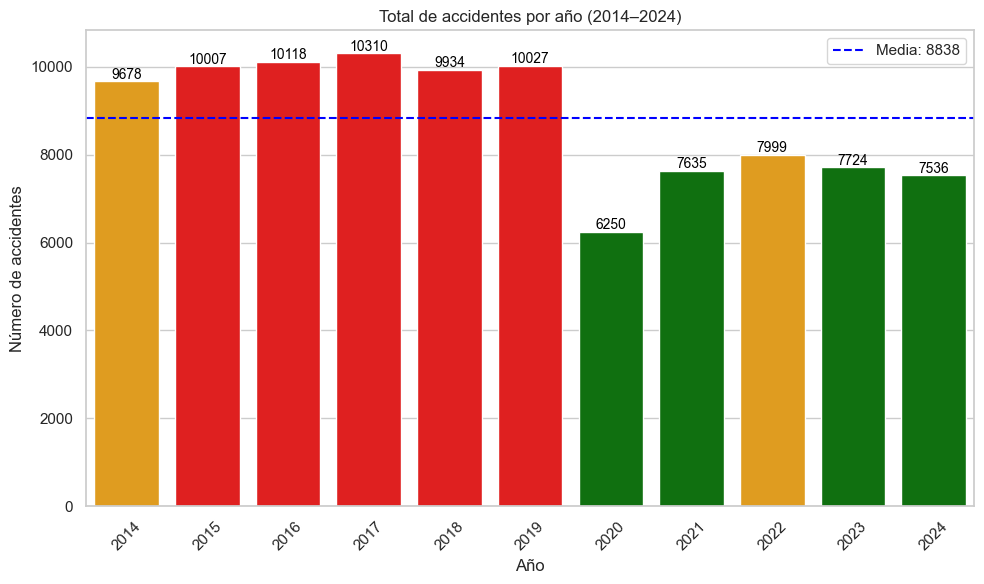

In [46]:
# Análisis gráfico

# Evolución temporal de accidentes y víctimas
# Gráfico 1: Número total de accidentes por año (Any)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo y tamaño del gráfico
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Calcular total de accidentes por año
accidentes_anuales = df_geo_enriquecido.groupby("Any").size().reset_index(name="Total_accidentes")

# Calcular la media
media = accidentes_anuales["Total_accidentes"].mean()
print(f"📊 Media de accidentes entre 2014 y 2024: {media:.2f}")

# Aplicar colores tipo semáforo
colores = ['green' if x < media * 0.9 else 'orange' if x < media * 1.1 else 'red'
           for x in accidentes_anuales["Total_accidentes"]]

# Crear gráfico
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=accidentes_anuales, x="Any", y="Total_accidentes", palette=colores)

# Añadir etiquetas encima de las barras
for i, row in accidentes_anuales.iterrows():
    bar.text(i, row["Total_accidentes"] + 50, f'{int(row["Total_accidentes"])}',
             color='black', ha="center", fontsize=10)

# Añadir línea horizontal con la media
plt.axhline(media, color='blue', linestyle='--', linewidth=1.5, label=f"Media: {media:.0f}")
plt.legend()

# Títulos y etiquetas
plt.title("Total de accidentes por año (2014–2024)")
plt.xlabel("Año")
plt.ylabel("Número de accidentes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Explicar los motivos que he escogido para la media: 

# 1. Calculo la media total de accidentes anuales.
# 2. Coloreo:
#   * Rojo: años con accidentes > media + 10%
#   * Amarillo: años dentro de ±10% de la media
#   * Verde: años con accidentes < media - 10%

📊 Media de accidentes entre 2014 y 2024: 8838.00


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/4195855697.py:41: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.

/Applications/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.



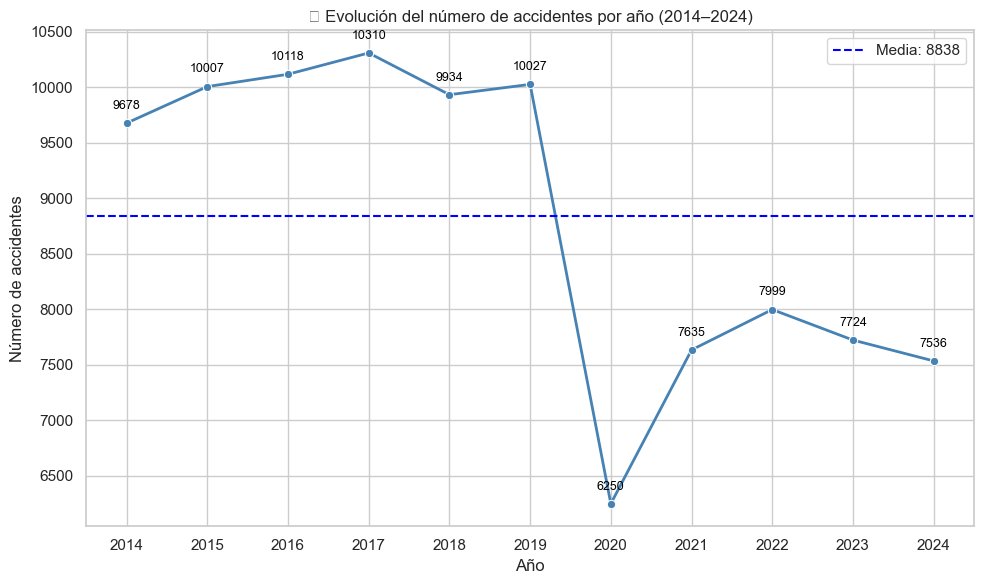

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Crear DataFrame base con todos los años del periodo
años_completos = pd.DataFrame({'Any': list(range(2014, 2025))})

# Calcular total de accidentes por año real
accidentes_anuales = df_geo_enriquecido.groupby("Any").size().reset_index(name="Total_accidentes")

# Unir con todos los años (para asegurar que estén todos, aunque con 0 accidentes si faltan)
accidentes_anuales = años_completos.merge(accidentes_anuales, on='Any', how='left').fillna(0)
accidentes_anuales["Total_accidentes"] = accidentes_anuales["Total_accidentes"].astype(int)

# Calcular la media real (solo con años con datos)
media = accidentes_anuales["Total_accidentes"].mean()
print(f"📊 Media de accidentes entre 2014 y 2024: {media:.2f}")

# Crear gráfico de líneas
plt.figure()
linea = sns.lineplot(data=accidentes_anuales, x="Any", y="Total_accidentes", marker='o', linewidth=2, color="steelblue")

# Añadir etiquetas con los totales
for i, row in accidentes_anuales.iterrows():
    plt.text(row["Any"], row["Total_accidentes"] + 100, str(row["Total_accidentes"]),
             ha='center', va='bottom', fontsize=9, color='black')

# Línea horizontal con la media
plt.axhline(media, color='blue', linestyle='--', linewidth=1.5, label=f"Media: {media:.0f}")
plt.legend()

# Ejes y título
plt.title("📈 Evolución del número de accidentes por año (2014–2024)")
plt.xlabel("Año")
plt.ylabel("Número de accidentes")
plt.xticks(ticks=accidentes_anuales["Any"])  # Mostrar todos los años
plt.tight_layout()
plt.show()


📊 Media de accidentes entre 2014 y 2024: 8838.00


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/2085106134.py:44: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.

/Applications/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.



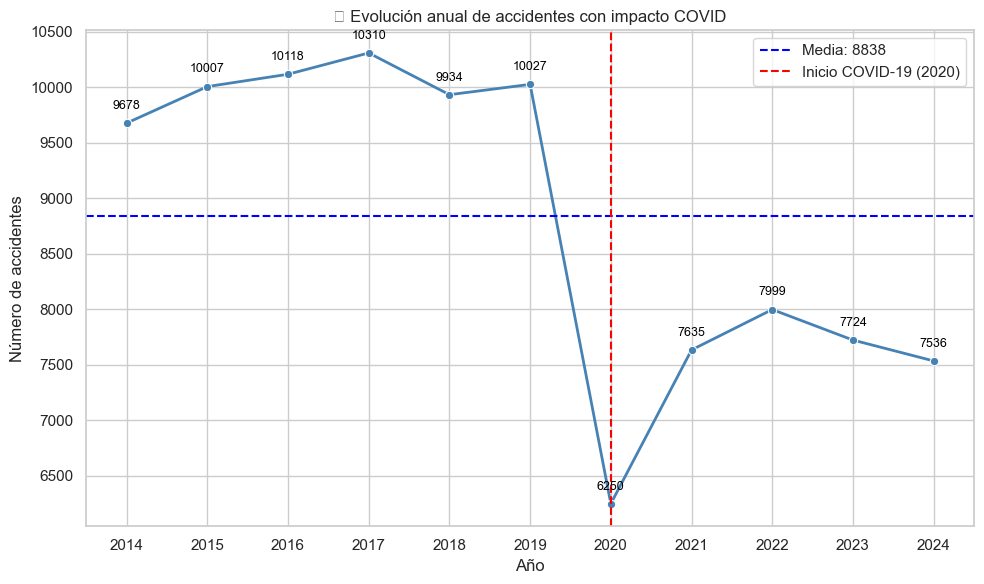

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo gráfico
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Rango completo de años
años_completos = pd.DataFrame({'Any': list(range(2014, 2025))})

# Total de accidentes por año
accidentes_anuales = df_geo_enriquecido.groupby("Any").size().reset_index(name="Total_accidentes")

# Asegurar que todos los años estén representados
accidentes_anuales = años_completos.merge(accidentes_anuales, on='Any', how='left').fillna(0)
accidentes_anuales["Total_accidentes"] = accidentes_anuales["Total_accidentes"].astype(int)

# Calcular media
media = accidentes_anuales["Total_accidentes"].mean()
print(f"📊 Media de accidentes entre 2014 y 2024: {media:.2f}")

# Gráfico de línea
plt.figure()
linea = sns.lineplot(data=accidentes_anuales, x="Any", y="Total_accidentes", marker='o', linewidth=2, color="steelblue")

# Etiquetas de totales
for i, row in accidentes_anuales.iterrows():
    plt.text(row["Any"], row["Total_accidentes"] + 100, str(row["Total_accidentes"]),
             ha='center', va='bottom', fontsize=9, color='black')

# Línea horizontal media
plt.axhline(media, color='blue', linestyle='--', linewidth=1.5, label=f"Media: {media:.0f}")

# Línea vertical COVID (2020)
plt.axvline(2020, color='red', linestyle='--', linewidth=1.5, label='Inicio COVID-19 (2020)')

# Título y ejes
plt.title("📈 Evolución anual de accidentes con impacto COVID")
plt.xlabel("Año")
plt.ylabel("Número de accidentes")
plt.xticks(ticks=accidentes_anuales["Any"])
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/1483434757.py:45: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.

/Applications/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.



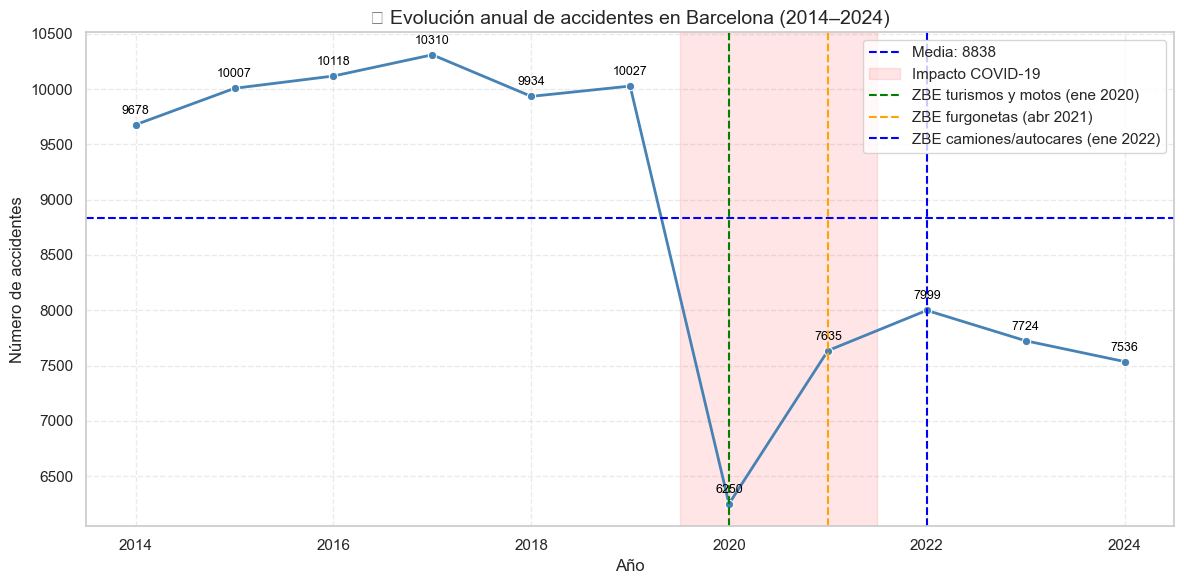

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar los datos por año
accidentes_anuales = df_geo_enriquecido.groupby('Any').size().reset_index(name='Total_accidentes')

# Asegurar que estén todos los años del 2014 al 2024 (rellena con 0 si falta alguno)
todos_los_años = pd.DataFrame({'Any': list(range(2014, 2025))})
accidentes_anuales = todos_los_años.merge(accidentes_anuales, on='Any', how='left').fillna(0)
accidentes_anuales['Total_accidentes'] = accidentes_anuales['Total_accidentes'].astype(int)

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=accidentes_anuales, x='Any', y='Total_accidentes', marker='o', linewidth=2, color="steelblue")

# Título, ejes y estilo
plt.title('📉 Evolución anual de accidentes en Barcelona (2014–2024)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de accidentes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Línea horizontal con la media
media = accidentes_anuales['Total_accidentes'].mean()
plt.axhline(media, color='blue', linestyle='--', linewidth=1.5, label=f"Media: {media:.0f}")

# Banda de impacto COVID-19
plt.axvspan(2019.5, 2021.5, color='red', alpha=0.1, label='Impacto COVID-19')

# Líneas verticales para ZBE
plt.axvline(x=2020, color='green', linestyle='--', linewidth=1.5, label='ZBE turismos y motos (ene 2020)')
plt.axvline(x=2021, color='orange', linestyle='--', linewidth=1.5, label='ZBE furgonetas (abr 2021)')
plt.axvline(x=2022, color='blue', linestyle='--', linewidth=1.5, label='ZBE camiones/autocares (ene 2022)')

# Mostrar el valor en cada punto
for i, row in accidentes_anuales.iterrows():
    plt.text(row['Any'], row['Total_accidentes'] + 100, str(row['Total_accidentes']),
             ha='center', fontsize=9, color='black')

# Limpiar leyenda (sin duplicados)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout()
plt.show()


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/1201808305.py:23: UserWarning:

Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) Arial.

/Applications/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128678 (\N{VERTICAL TRAFFIC LIGHT}) missing from font(s) Arial.



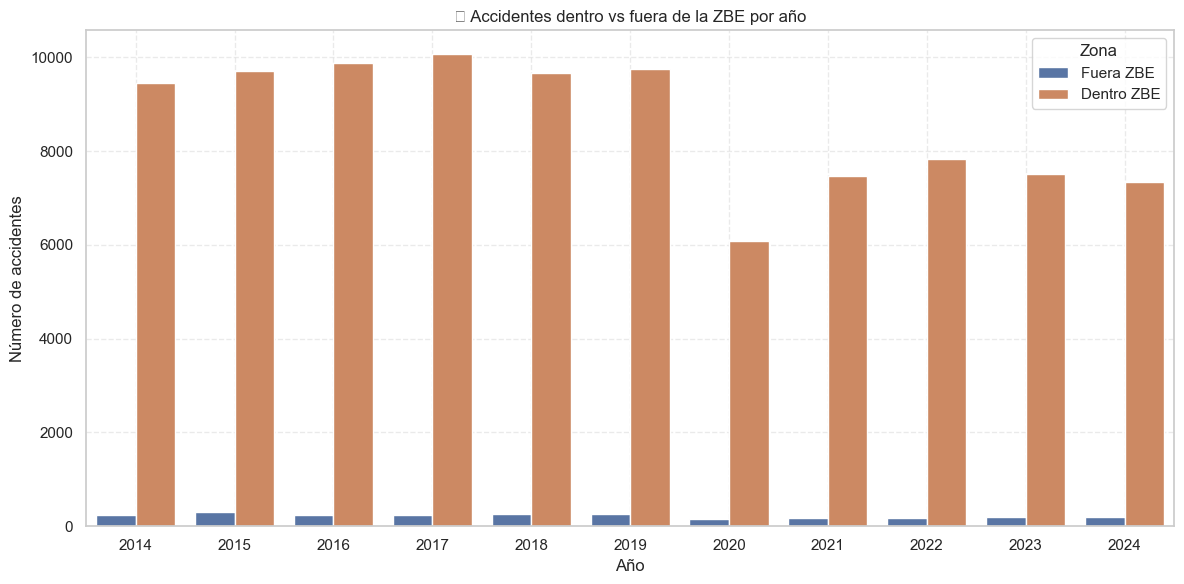

In [94]:
#Comparativa de accidentes dentro vs fuera de la ZBE por año

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por año y por si están dentro o fuera de la ZBE
zbe_comparativa = df_geo_enriquecido.groupby(['Any', 'en_ZBE']).size().reset_index(name='Total_accidentes')

# Convertir en_ZBE a etiquetas más legibles
zbe_comparativa['Zona'] = zbe_comparativa['en_ZBE'].map({True: 'Dentro ZBE', False: 'Fuera ZBE'})

# Crear gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=zbe_comparativa, x='Any', y='Total_accidentes', hue='Zona')

# Estética
plt.title("🚦 Accidentes dentro vs fuera de la ZBE por año")
plt.xlabel("Año")
plt.ylabel("Número de accidentes")
plt.legend(title='Zona')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


⏰ Media de accidentes por hora (2014–2024): 4050.75


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/3722346770.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=acc_hora.index, y=acc_hora.values, palette=colores)
/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/3722346770.py:40: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  plt.tight_layout()
/Applications/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


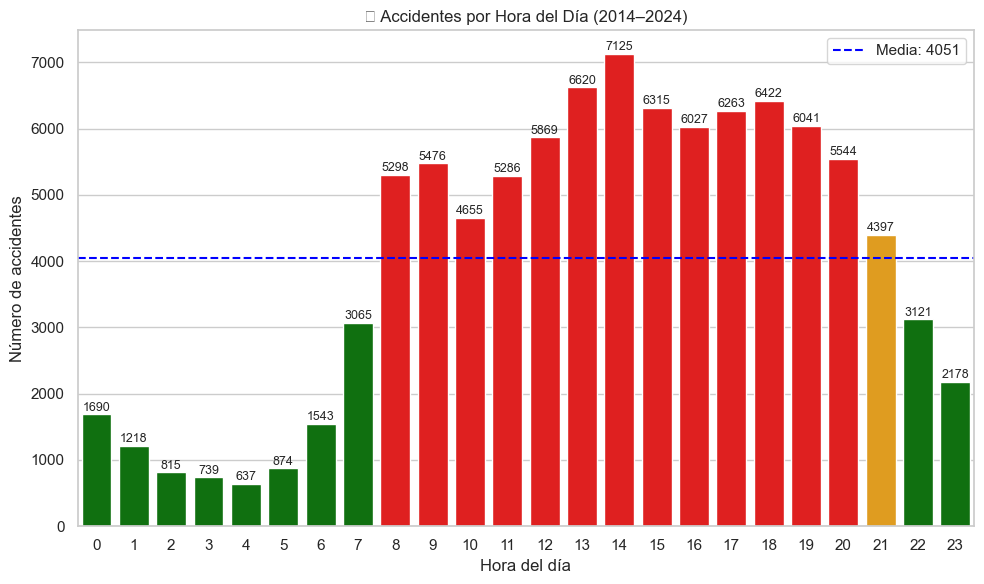

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución horaria y semanal
# Gráfico 2: Accidentes por hora del día (Hora_dia)

# Estilo visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Función de color tipo semáforo
def aplicar_color_semaforo(valores, umbral):
    return ['green' if v < umbral * 0.9 else 'orange' if v < umbral * 1.1 else 'red' for v in valores]

# Agrupar accidentes por hora
acc_hora = df_geo_enriquecido['Hora_dia'].value_counts().sort_index()
media_hora = acc_hora.mean()
print(f"⏰ Media de accidentes por hora (2014–2024): {media_hora:.2f}")

# Colores tipo semáforo
colores = aplicar_color_semaforo(acc_hora.values, media_hora)

# Crear gráfico
plt.figure()
bar = sns.barplot(x=acc_hora.index, y=acc_hora.values, palette=colores)

# Etiquetas encima de las barras
for i, val in enumerate(acc_hora.values):
    bar.text(i, val + 10, f'{val}', ha='center', va='bottom', fontsize=9)

# Línea horizontal con la media
plt.axhline(media_hora, color='blue', linestyle='--', linewidth=1.5, label=f"Media: {media_hora:.0f}")
plt.legend()

# Títulos y ejes
plt.title("⏰ Accidentes por Hora del Día (2014–2024)")
plt.xlabel("Hora del día")
plt.ylabel("Número de accidentes")
plt.tight_layout()
plt.show()


📆 Media de accidentes por día de la semana: 13888.29


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/3982038899.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=acc_dia.index, y=acc_dia.values, palette=colores)
/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/3982038899.py:30: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
/Applications/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


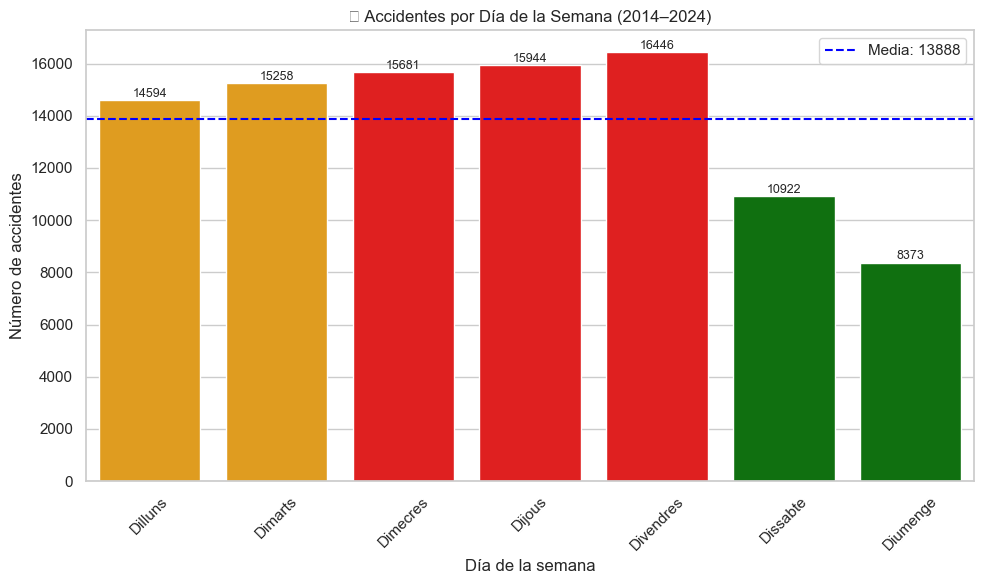

In [49]:
# Grafico 3: accidentes por día de la semana

# Agrupar accidentes por día de la semana
acc_dia = df_geo_enriquecido['Descripcio_dia_setmana'].value_counts().reindex([
    'Dilluns', 'Dimarts', 'Dimecres', 'Dijous', 'Divendres', 'Dissabte', 'Diumenge'
])
media_dia = acc_dia.mean()
print(f"📆 Media de accidentes por día de la semana: {media_dia:.2f}")

# Aplicar colores tipo semáforo
colores = aplicar_color_semaforo(acc_dia.values, media_dia)

# Crear gráfico
plt.figure()
bar = sns.barplot(x=acc_dia.index, y=acc_dia.values, palette=colores)

# Etiquetas
for i, val in enumerate(acc_dia.values):
    bar.text(i, val + 10, f'{val}', ha='center', va='bottom', fontsize=9)

# Línea de media
plt.axhline(media_dia, color='blue', linestyle='--', linewidth=1.5, label=f"Media: {media_dia:.0f}")
plt.legend()

# Títulos y ejes
plt.title("📆 Accidentes por Día de la Semana (2014–2024)")
plt.xlabel("Día de la semana")
plt.ylabel("Número de accidentes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/1149829150.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=acc_turno.index, y=acc_turno.values, palette=colores)


🌞 Media de accidentes por turno: 32406.00


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/1149829150.py:27: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) Arial.
  plt.tight_layout()
/Applications/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


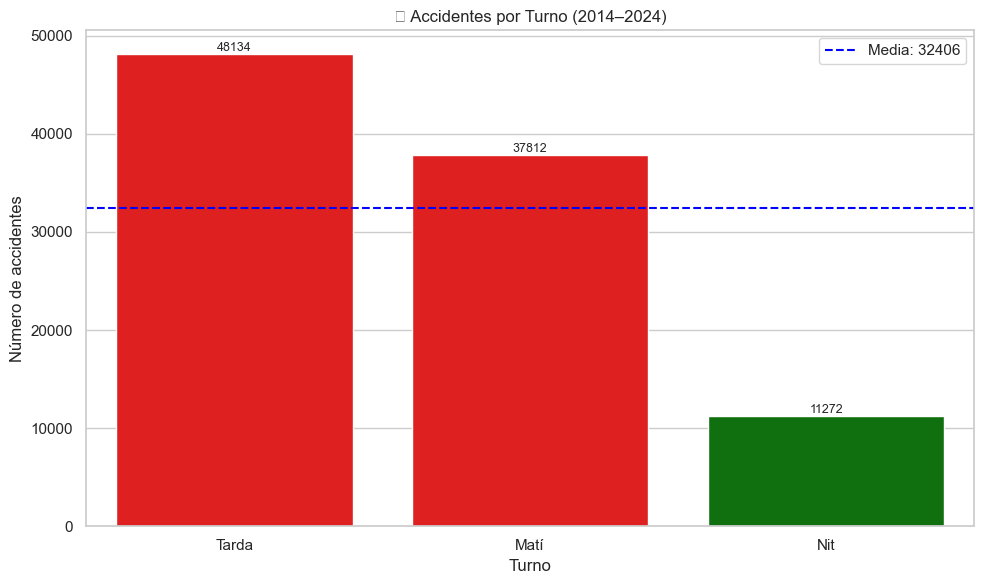

In [52]:
# Gráfico 4: Accidentes por turno

# Agrupar por turno del día
acc_turno = df_geo_enriquecido['Descripcio_torn'].value_counts()
media_turno = acc_turno.mean()
print(f"🌞 Media de accidentes por turno: {media_turno:.2f}")

# Colores tipo semáforo
colores = aplicar_color_semaforo(acc_turno.values, media_turno)

# Crear gráfico
plt.figure()
bar = sns.barplot(x=acc_turno.index, y=acc_turno.values, palette=colores)

# Etiquetas
for i, val in enumerate(acc_turno.values):
    bar.text(i, val + 10, f'{val}', ha='center', va='bottom', fontsize=9)

# Línea media
plt.axhline(media_turno, color='blue', linestyle='--', linewidth=1.5, label=f"Media: {media_turno:.0f}")
plt.legend()

# Títulos y ejes
plt.title("🌞 Accidentes por Turno (2014–2024)")
plt.xlabel("Turno")
plt.ylabel("Número de accidentes")
plt.tight_layout()
plt.show()


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/1409408972.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(x=acc_districte.index, y=acc_districte.values, palette=colores)


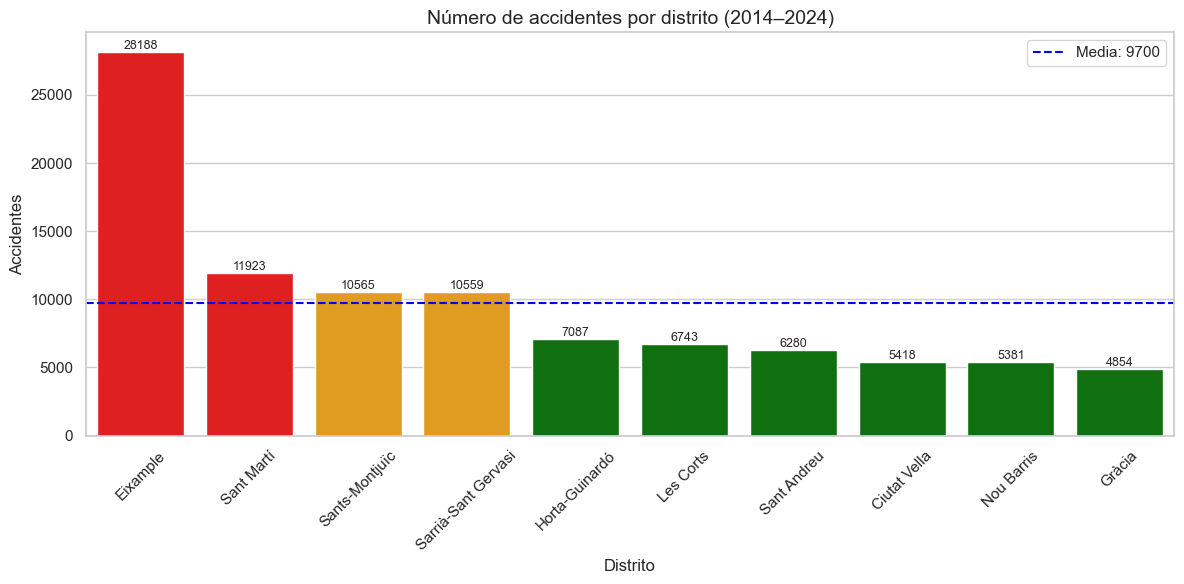

In [75]:
# Distribución geográfica
# Objetivo: Ver los distritos y barrios más afectados.
# Gráfico 5: Barras por Nom_districte.

# Eliminar registros con distrito "Desconegut"
df_filtrado = df_geo_enriquecido[df_geo_enriquecido["Nom_districte"] != "Desconegut"]

# Calcular número de accidentes por distrito
acc_districte = df_filtrado["Nom_districte"].value_counts().sort_values(ascending=False)

# Calcular media
media_districte = acc_districte.mean()

# Función de semáforo
def aplicar_color_semaforo(valores, umbral):
    return ['green' if v < umbral * 0.9 else 'orange' if v < umbral * 1.1 else 'red' for v in valores]

# Aplicar colores
colores = aplicar_color_semaforo(acc_districte.values, media_districte)

# Crear gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
barras = sns.barplot(x=acc_districte.index, y=acc_districte.values, palette=colores)

# Etiquetas encima de las barras
for i, bar in enumerate(barras.patches):
    altura = bar.get_height()
    barras.annotate(f'{int(altura)}',
                    (bar.get_x() + bar.get_width() / 2, altura),
                    ha='center', va='bottom', fontsize=9)

# Línea de la media
plt.axhline(media_districte, color='blue', linestyle='--', label=f'Media: {media_districte:.0f}')
plt.legend()

# Títulos
plt.title("Número de accidentes por distrito (2014–2024)", fontsize=14)
plt.xlabel("Distrito")
plt.ylabel("Accidentes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/2367798241.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(x=acc_barri.index, y=acc_barri.values, palette=colores)
/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/2367798241.py:42: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/2367798241.py:42: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/Applications/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: 

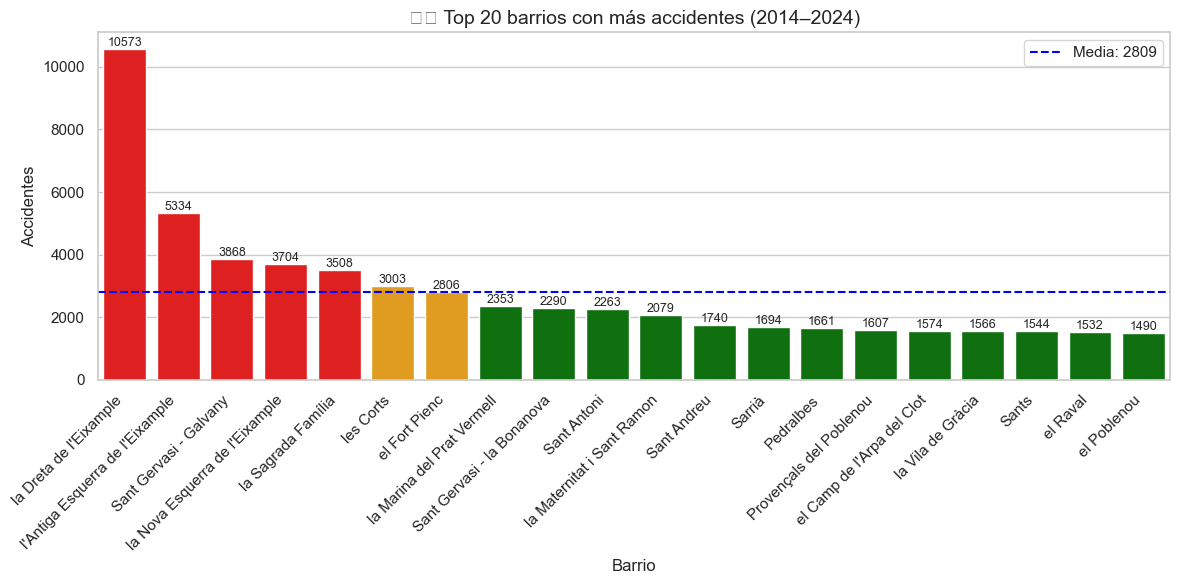

In [76]:
# Gráfico 6: Los 20 barrios con más accidentes.
# El color rojo indica que ese barrio supera significativamente la media del top 20.

import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar barrios válidos
df_barri = df_geo_enriquecido[df_geo_enriquecido["Nom_barri"] != "Desconegut"]

# Agrupar por barrio y seleccionar top 20
acc_barri = df_barri["Nom_barri"].value_counts().nlargest(20).sort_values(ascending=False)

# Calcular media del top 20
media_barri = acc_barri.mean()

# Función de colores semáforo
def aplicar_color_semaforo(valores, umbral):
    return ['green' if v < umbral * 0.9 else 'orange' if v < umbral * 1.1 else 'red' for v in valores]

colores = aplicar_color_semaforo(acc_barri.values, media_barri)

# Crear gráfico
plt.figure(figsize=(12, 6))
barras = sns.barplot(x=acc_barri.index, y=acc_barri.values, palette=colores)

# Etiquetas encima de las barras
for i, bar in enumerate(barras.patches):
    altura = bar.get_height()
    barras.annotate(f'{int(altura)}',
                    (bar.get_x() + bar.get_width() / 2, altura),
                    ha='center', va='bottom', fontsize=9)

# Línea de media
plt.axhline(media_barri, color='blue', linestyle='--', label=f'Media: {media_barri:.0f}')
plt.legend()

# Títulos y formato
plt.title("🏘️ Top 20 barrios con más accidentes (2014–2024)", fontsize=14)
plt.xlabel("Barrio")
plt.ylabel("Accidentes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [128]:
# Calcular total de accidentes por severidad
totales_severidad = df_geo_enriquecido['severidad'].value_counts().sort_index()

# Mostrar resultados
print(totales_severidad)


severidad
Grave      2140
Ileso      8646
Leve      86212
Mortal      220
Name: count, dtype: int64


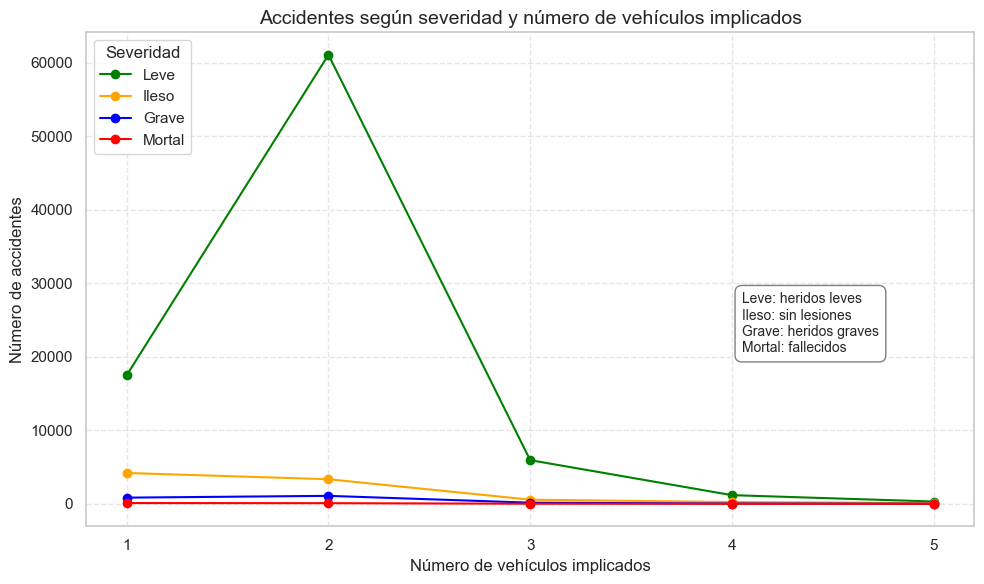

In [133]:
import matplotlib.pyplot as plt

# Filtrar solo de 1 a 5 vehículos implicados
pivot_simple = pivot_vehiculos[pivot_vehiculos.index.isin([1, 2, 3, 4, 5])]

# Crear gráfico de líneas simple
plt.figure(figsize=(10, 6))
plt.plot(pivot_simple.index, pivot_simple['Leve'], marker='o', label='Leve', color='green')
plt.plot(pivot_simple.index, pivot_simple['Ileso'], marker='o', label='Ileso', color='orange')
plt.plot(pivot_simple.index, pivot_simple['Grave'], marker='o', label='Grave', color='blue')
plt.plot(pivot_simple.index, pivot_simple['Mortal'], marker='o', label='Mortal', color='red')

# Estética
plt.title('Accidentes según severidad y número de vehículos implicados', fontsize=14)
plt.xlabel('Número de vehículos implicados')
plt.ylabel('Número de accidentes')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Severidad', loc='upper left')
plt.tight_layout()

# Añadir leyenda explicativa textual a un lado
leyenda_exp = (
    "Leve: heridos leves\n"
    "Ileso: sin lesiones\n"
    "Grave: heridos graves\n"
    "Mortal: fallecidos"
)
plt.gcf().text(
    0.75, 0.4, leyenda_exp,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.show()



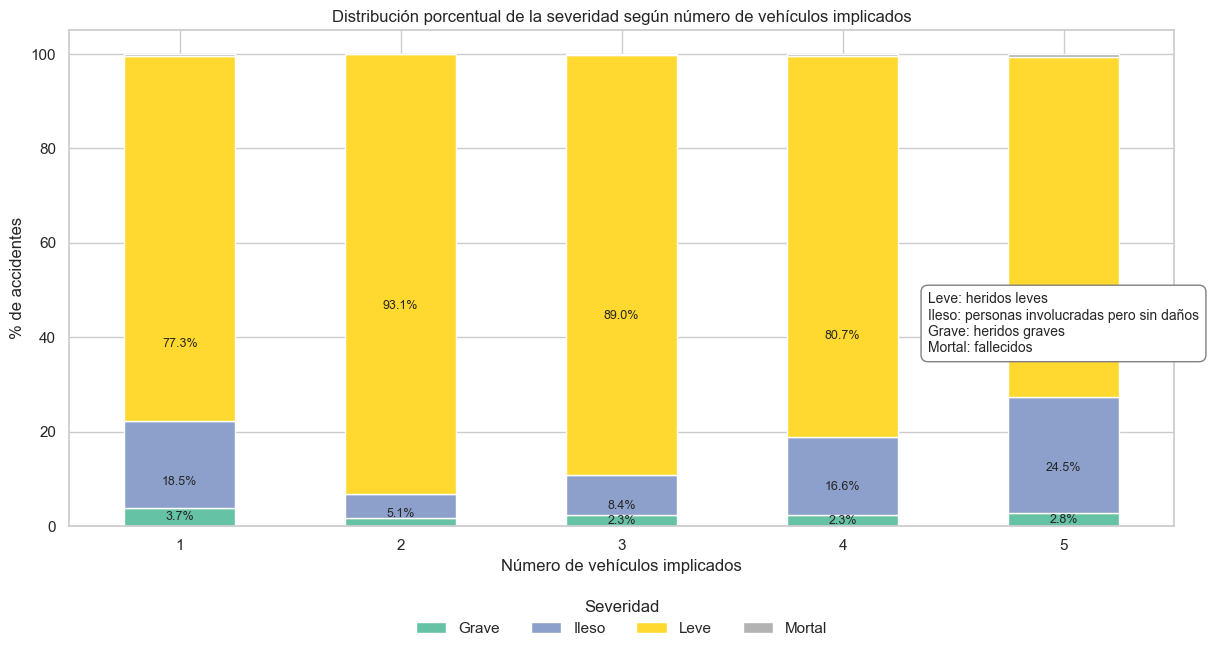

In [122]:
import matplotlib.pyplot as plt

# Eliminar accidentes sin vehículos implicados
pivot_vehiculos = pivot_vehiculos[pivot_vehiculos.index > 0]

# Calcular porcentajes por fila
pivot_pct = pivot_vehiculos.div(pivot_vehiculos.sum(axis=1), axis=0) * 100

# Crear gráfico
ax = pivot_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Set2'
)

plt.title('Distribución porcentual de la severidad según número de vehículos implicados')
plt.xlabel('Número de vehículos implicados')
plt.ylabel('% de accidentes')
plt.xticks(rotation=0)
plt.tight_layout()

# Añadir etiquetas con porcentajes en cada segmento
for i, col in enumerate(pivot_pct.columns):
    y_offset = [0] * len(pivot_pct)
    for j, val in enumerate(pivot_pct[col]):
        if val > 2:
            ax.text(j, y_offset[j] + val / 2, f"{val:.1f}%", ha='center', va='center', fontsize=9)
        y_offset[j] += val

# Reposicionar la leyenda de colores (arriba centrada)
ax.legend(
    title='Severidad',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.12),
    ncol=4,
    frameon=False
)

# Añadir leyenda explicativa textual a un lado
leyenda_exp = (
    "Leve: heridos leves\n"
    "Ileso: personas involucradas pero sin daños\n"
    "Grave: heridos graves\n"
    "Mortal: fallecidos"
)
plt.gcf().text(
    0.78, 0.4, leyenda_exp,
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.show()


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/645333042.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/645333042.py:24: UserWarning:

Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.

/Applications/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.



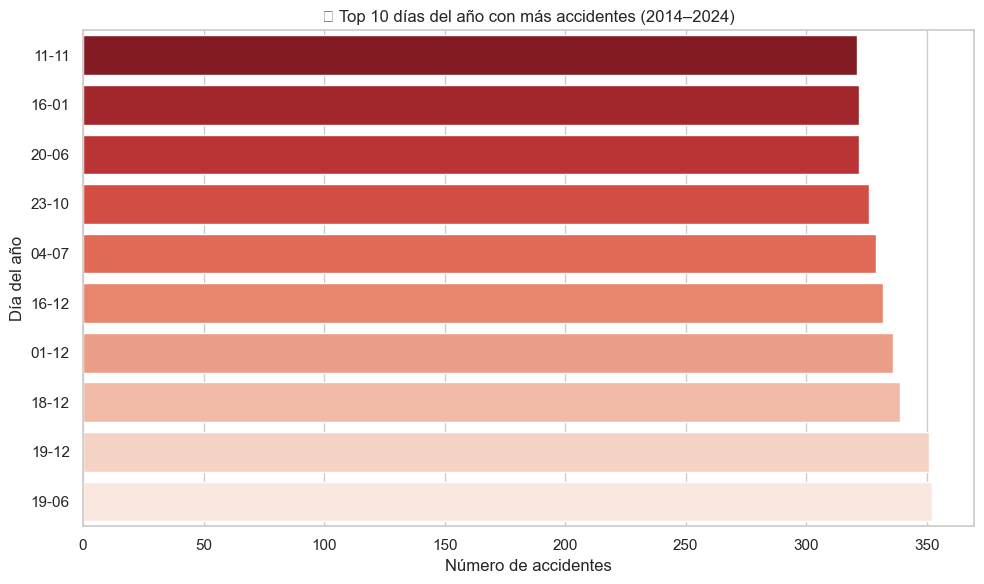

In [105]:
# Top 10 Días del Año con Más Accidentes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear columna Fecha sin renombrar el DataFrame original
df['Fecha'] = pd.to_datetime(df[['Any', 'Mes_any', 'Dia_mes']].rename(
    columns={'Any': 'year', 'Mes_any': 'month', 'Dia_mes': 'day'}
), errors='coerce')

# Crear columna con el día y mes (ignora el año para detectar picos estacionales)
df['Dia_anyo'] = df['Fecha'].dt.strftime('%d-%m')

# Contar los accidentes por día del año (independientemente del año)
top_dias = df['Dia_anyo'].value_counts().head(10).sort_values()

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=top_dias.values, y=top_dias.index, palette='Reds_r')
plt.title("📅 Top 10 días del año con más accidentes (2014–2024)")
plt.xlabel("Número de accidentes")
plt.ylabel("Día del año")
plt.tight_layout()
plt.show()

# Análisis espacial y puntos negros
# Puntos de Interés (POIs)

In [107]:
import json
import requests # Aunque overpy lo usa internamente, es bueno tenerlo si se usa directamente
from overpy import Overpass # Asegúrate de tener 'overpy' instalado (pip install overpy)

# Define tipos de POIs con sus filtros
# Se ha añadido la categoría 'colegios'
poi_types = {
    "hospitales": [("amenity", "hospital")],
    "estaciones_metro": [("railway", "subway_entrance"), ("railway", "station")],
    "paradas_bus": [("highway", "bus_stop")],
    "parques": [("leisure", "park"), ("leisure", "garden")],
    "gasolineras": [("amenity", "fuel")],
    "restaurantes": [("amenity", "restaurant")],
    "zonas_comerciales": [("landuse", "commercial"), ("landuse", "retail")],
    "colegios": [("amenity", "school")] # Nueva adición para colegios
}

# Función para obtener POIs (sin cambios, es la misma que ya usabas)
def get_pois_multi_filters(filters, bbox, api_overpass):
    pois = []
    seen = set() # Para evitar duplicados si un POI coincide con múltiples filtros
    for key, value in filters:
        # Se ha corregido la cadena de consulta Overpass QL:
        # El comentario sobre 'out center;' se ha movido a una línea separada dentro de la f-string
        # para evitar el error de parseo en Overpass API.
        query = f"""
        (
          node["{key}"="{value}"]({bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]});
          way["{key}"="{value}"]({bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]});
          relation["{key}"="{value}"]({bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]});
        );
        out center; 
        // Pedimos el centro de ways y relations (este es un comentario válido en Overpass QL)
        """
        try:
            result = api_overpass.query(query)
            
            # Procesar nodos
            for node in result.nodes:
                name = node.tags.get("name", "Sin nombre")
                lat, lon = float(node.lat), float(node.lon)
                unique_key = (name, lat, lon) # Identificador único para el POI
                if unique_key not in seen:
                    pois.append({"tipo_elemento_osm": "node", "nombre": name, "lat": lat, "lon": lon})
                    seen.add(unique_key)

            # Procesar vías (ways)
            for way in result.ways:
                name = way.tags.get("name", "Sin nombre")
                # overpy intenta añadir center_lat/lon si 'out center' se usa
                lat = getattr(way, "center_lat", None)
                lon = getattr(way, "center_lon", None)
                if lat and lon: # Asegurarse de que el centro existe
                    lat, lon = float(lat), float(lon)
                    unique_key = (name, lat, lon)
                    if unique_key not in seen:
                        pois.append({"tipo_elemento_osm": "way", "nombre": name, "lat": lat, "lon": lon})
                        seen.add(unique_key)

            # Procesar relaciones (relations)
            for rel in result.relations:
                name = rel.tags.get("name", "Sin nombre")
                # overpy intenta añadir center_lat/lon si 'out center' se usa
                lat = getattr(rel, "center_lat", None)
                lon = getattr(rel, "center_lon", None)
                if lat and lon: # Asegurarse de que el centro existe
                    lat, lon = float(lat), float(lon)
                    unique_key = (name, lat, lon)
                    if unique_key not in seen:
                        pois.append({"tipo_elemento_osm": "relation", "nombre": name, "lat": lat, "lon": lon})
                        seen.add(unique_key)

        except Exception as e:
            print(f"Error al obtener POIs con filtro {key}={value}: {e}")
    return pois

# Bounding box de Barcelona: sur, oeste, norte, este
# Esta bbox define el área geográfica para la búsqueda de POIs en Barcelona
bbox = [41.3200, 2.0690, 41.4700, 2.2300]

# Instanciar la API de Overpass
api = Overpass()

# Descargar POIs para cada categoría definida
print("Iniciando descarga de POIs de Barcelona con múltiples filtros (incluyendo colegios)...\n")
all_pois = {}

for poi_name, filters in poi_types.items():
    print(f"Extrayendo {poi_name}...")
    pois = get_pois_multi_filters(filters, bbox, api)
    if pois:
        all_pois[poi_name] = pois
        print(f"  -> {len(pois)} {poi_name} encontrados.")
    else:
        print(f"  -> No se encontraron {poi_name}.")
    print("-" * 30) # Separador para mejor lectura

# Guardar los resultados en un archivo JSON
output_file_name = "pois_barcelona.json"
with open(output_file_name, "w", encoding="utf-8") as f:
    # `indent=2` para una mejor legibilidad del JSON
    # `ensure_ascii=False` para permitir caracteres Unicode (acentos, ñ, etc.)
    json.dump(all_pois, f, indent=2, ensure_ascii=False)

print(f"Descarga de POIs completada. Resultados guardados en '{output_file_name}'.")

# Puedes añadir aquí una pequeña muestra para verificar
print("\nEjemplo de los primeros 5 colegios encontrados:")
for poi in all_pois.get("colegios", [])[:5]:
    print(poi)



Iniciando descarga de POIs de Barcelona con múltiples filtros (incluyendo colegios)...

Extrayendo hospitales...
  -> 38 hospitales encontrados.
------------------------------
Extrayendo estaciones_metro...
  -> 606 estaciones_metro encontrados.
------------------------------
Extrayendo paradas_bus...
  -> 4830 paradas_bus encontrados.
------------------------------
Extrayendo parques...
  -> 4177 parques encontrados.
------------------------------
Extrayendo gasolineras...
  -> 164 gasolineras encontrados.
------------------------------
Extrayendo restaurantes...
  -> 3965 restaurantes encontrados.
------------------------------
Extrayendo zonas_comerciales...
  -> 75 zonas_comerciales encontrados.
------------------------------
Extrayendo colegios...
  -> 748 colegios encontrados.
------------------------------
Descarga de POIs completada. Resultados guardados en 'pois_barcelona.json'.

Ejemplo de los primeros 5 colegios encontrados:
{'tipo_elemento_osm': 'node', 'nombre': 'Escola Ca

# Mapas

In [108]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
import geopandas as gpd
import json

# Cargar los datos de accidentes
df = pd.read_excel("df_geo_enriquecido_CORREGIDO_FINAL.xlsx")
df = df.dropna(subset=["Latitud", "Longitud"])

# Crear mapa base centrado en Barcelona
mapa = folium.Map(location=[41.3851, 2.1734], zoom_start=12, tiles="CartoDB positron")

# Añadir polígono de la ZBE (usando GeoJson en capa separada)
zbe = gpd.read_file("2023_ambit_zbe_barcelona.gpkg", layer="2023_Ambit_ZBE_Barcelona")
folium.GeoJson(
    zbe.to_json(),
    name="Zona de Bajas Emisiones (ZBE)",
    style_function=lambda x: {
        "fillColor": "blue",
        "color": "blue",
        "weight": 2,
        "fillOpacity": 0.1,
    },
).add_to(mapa)

# Añadir accidentes con MarkerCluster
acc_cluster = MarkerCluster(name="Accidentes").add_to(mapa)
for _, row in df.iterrows():
    folium.Marker(
        location=[row["Latitud"], row["Longitud"]],
        popup=(
            f"<b>Año:</b> {row['Any']}<br>"
            f"<b>Distrito:</b> {row['Nom_districte']}<br>"
            f"<b>Gravedad:</b> {row.get('severidad', 'Desconocida')}"
        ),
        icon=folium.Icon(color="red", icon="info-sign"),
    ).add_to(acc_cluster)

# Cargar POIs
with open("pois_barcelona.json", "r", encoding="utf-8") as f:
    pois = json.load(f)

# Definir colores por tipo de POI
colores_poi = {
    "hospitales": "darkred",
    "estaciones_metro": "purple",
    "paradas_bus": "orange",
    "parques": "green",
    "gasolineras": "blue",
    "restaurantes": "cadetblue",
    "zonas_comerciales": "pink",
    "colegios": "darkgreen",
}

# Añadir POIs por grupo
for tipo, lista in pois.items():
    capa = folium.FeatureGroup(name=f"{tipo.capitalize()} (POI)")
    for poi in lista:
        folium.CircleMarker(
            location=[poi["lat"], poi["lon"]],
            radius=4,
            color=colores_poi.get(tipo, "gray"),
            fill=True,
            fill_opacity=0.7,
            popup=f"{tipo.capitalize()}: {poi['nombre']}",
        ).add_to(capa)
    capa.add_to(mapa)

# Añadir control de capas
folium.LayerControl(collapsed=False).add_to(mapa)

# Guardar
mapa.save("mapa_accidentes_zbe_pois.html")
print("✅ Mapa guardado como 'mapa_accidentes_zbe_pois.html'")

✅ Mapa guardado como 'mapa_accidentes_zbe_pois.html'


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/2924265175.py:79: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/2924265175.py:90: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.

/Applications/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) Arial.



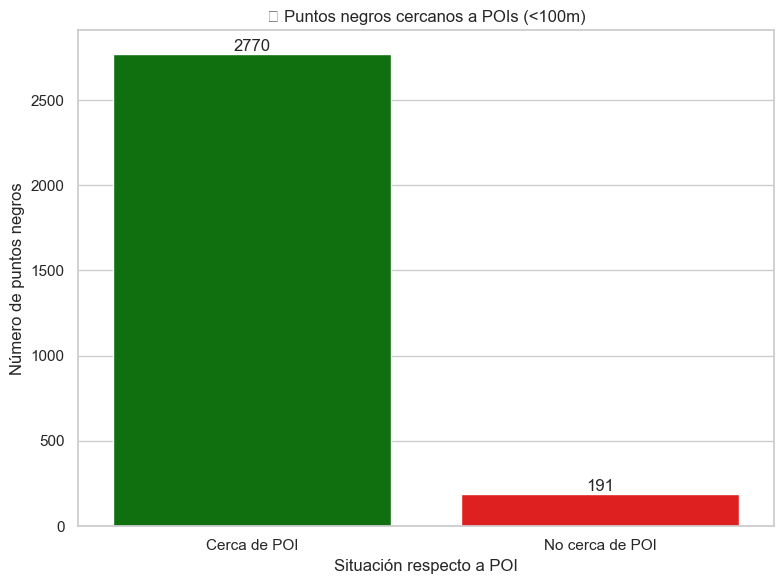

In [139]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

# -------------------------
# CARGA DE DATOS
# -------------------------

# Leer solo las columnas necesarias del Excel
df_path = "/Users/mac/Desktop/Proyecto_siniestralidad_barcelona/Datasets corregidos/df_geo_enriquecido_CORREGIDO_FINAL.xlsx"
cols = ["Nom_carrer", "Latitud", "Longitud", "N˙mero_dexpedient"]
df = pd.read_excel(df_path, usecols=cols)

# Eliminar filas con coordenadas nulas
df = df.dropna(subset=["Latitud", "Longitud"])

# -------------------------
# AGRUPACIÓN POR UBICACIÓN
# -------------------------

# Redondear coordenadas a 3 decimales (~110 metros de tolerancia)
df["Lat_round"] = df["Latitud"].round(3)
df["Lon_round"] = df["Longitud"].round(3)

# Agrupar por coordenadas redondeadas y contar ocurrencias
grupo = df.groupby(["Lat_round", "Lon_round"]).size().reset_index(name="conteo")

# Definir umbral para considerar punto negro
umbral = 10  # Puedes ajustar a 5 o 20 según la densidad
puntos_negros = grupo[grupo["conteo"] >= umbral].copy()

# -------------------------
# CARGA DE POIs
# -------------------------

# Leer los POIs desde el JSON
pois_path = "/Users/mac/Desktop/Proyecto_siniestralidad_barcelona/pois_barcelona.json"
with open(pois_path, "r", encoding="utf-8") as f:
    pois_data = json.load(f)

# Extraer lista de coordenadas (lat, lon)
coordenadas_pois = []
for categoria, pois in pois_data.items():
    for poi in pois:
        coordenadas_pois.append((poi["lat"], poi["lon"]))

# -------------------------
# DETECCIÓN DE CERCANÍA
# -------------------------

# Función para verificar si un punto está a menos de X metros de un POI
def esta_cerca(lat, lon, pois, radio=100):
    for plat, plon in pois:
        if geodesic((lat, lon), (plat, plon)).meters <= radio:
            return True
    return False

# Aplicar la función a cada punto negro
puntos_negros["cerca_POI"] = [
    esta_cerca(lat, lon, coordenadas_pois, radio=100)
    for lat, lon in zip(puntos_negros["Lat_round"], puntos_negros["Lon_round"])
]

# -------------------------
# RESULTADOS Y VISUALIZACIÓN
# -------------------------

# Contar cuántos están cerca de un POI y cuántos no
conteo_final = puntos_negros["cerca_POI"].value_counts().rename(
    {True: "Cerca de POI", False: "No cerca de POI"}
).reset_index()
conteo_final.columns = ["Situación", "Cantidad"]

# Gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=conteo_final, x="Situación", y="Cantidad", palette=["green", "red"])

# Añadir etiquetas
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.title("📍 Puntos negros cercanos a POIs (<100m)")
plt.ylabel("Número de puntos negros")
plt.xlabel("Situación respecto a POI")
plt.tight_layout()
plt.show()


In [63]:
# Mapa 1 : accidentes por zona (clusters)

import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Filtrar solo filas con coordenadas válidas
df_mapa = df_geo_enriquecido.dropna(subset=["Latitud", "Longitud"])

# Crear mapa centrado en Barcelona
mapa = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

# Crear clúster
marker_cluster = MarkerCluster().add_to(mapa)

# Añadir puntos al clúster
for _, row in df_mapa.iterrows():
    folium.Marker(
        location=[row["Latitud"], row["Longitud"]],
        popup=f"Distrito: {row['Nom_districte']}<br>Año: {row['Any']}<br>Gravedad: {row['severidad']}"
    ).add_to(marker_cluster)

# Mostrar mapa
mapa.save("mapa_accidentes_cluster.html")

# dar mas granulidad de colores no solo 3!!! mas degradado!!!


In [78]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster


# Filtrar coordenadas válidas
df_mapa = df.dropna(subset=["Latitud", "Longitud"]).copy()

# Crear zonas agrupadas (3 decimales = agrupación por área aproximada)
df_mapa["lat_round"] = df_mapa["Latitud"].round(3)
df_mapa["lon_round"] = df_mapa["Longitud"].round(3)

# Agrupar por zona y contar accidentes
zona_accidentes = df_mapa.groupby(["lat_round", "lon_round"]).size().reset_index(name="n_accidentes")

# Escalado para colores (entre 0 y 1)
zona_accidentes["norm"] = (zona_accidentes["n_accidentes"] - zona_accidentes["n_accidentes"].min()) / (zona_accidentes["n_accidentes"].max() - zona_accidentes["n_accidentes"].min())

# Función con más gradación de colores tipo semáforo
def color_gradiente(val):
    if val < 0.15:
        return "#2ECC71"  # verde claro
    elif val < 0.3:
        return "#27AE60"  # verde oscuro
    elif val < 0.45:
        return "#F1C40F"  # amarillo
    elif val < 0.6:
        return "#E67E22"  # naranja
    elif val < 0.75:
        return "#D35400"  # naranja oscuro
    else:
        return "#C0392B"  # rojo fuerte

zona_accidentes["color"] = zona_accidentes["norm"].apply(color_gradiente)

# Crear el mapa centrado en Barcelona
mapa = folium.Map(location=[41.3851, 2.1734], zoom_start=12)
cluster = MarkerCluster().add_to(mapa)

# Añadir los puntos agrupados con colores degradados
for _, row in zona_accidentes.iterrows():
    folium.CircleMarker(
        location=[row["lat_round"], row["lon_round"]],
        radius=7,
        color=row["color"],
        fill=True,
        fill_color=row["color"],
        fill_opacity=0.8,
        popup=f"Nº Accidentes: {row['n_accidentes']}"
    ).add_to(cluster)

# Guardar el mapa
mapa.save("mapa_cluster_gradiente.html")
print("✅ Mapa generado y guardado como 'mapa_cluster_gradiente.html'")


✅ Mapa generado y guardado como 'mapa_cluster_gradiente.html'


In [79]:
import folium
from folium.plugins import MarkerCluster, HeatMap
import pandas as pd

# Filtrado de datos válidos con coordenadas
df_mapa = df_geo_enriquecido.dropna(subset=["Latitud", "Longitud"])

# Crear mapa centrado en Barcelona
mapa = folium.Map(location=[41.3851, 2.1734], zoom_start=12, tiles='CartoDB positron')

# Añadir capa de Heatmap
heat_data = df_mapa[['Latitud', 'Longitud']].values.tolist()
HeatMap(heat_data, radius=10, blur=15, min_opacity=0.5).add_to(mapa)

# Crear clúster de marcadores
marker_cluster = MarkerCluster(name='Accidentes por Clúster').add_to(mapa)

# Función para asignar color según severidad
def color_severidad(severidad):
    if severidad == 'mortal':
        return 'red'
    elif severidad == 'grave':
        return 'orange'
    else:
        return 'green'

# Añadir marcadores al clúster
for _, row in df_mapa.iterrows():
    folium.CircleMarker(
        location=[row["Latitud"], row["Longitud"]],
        radius=4,
        color=color_severidad(row["severidad"]),
        fill=True,
        fill_opacity=0.7,
        popup=f"<b>Año:</b> {row['Any']}<br><b>Distrito:</b> {row['Nom_districte']}<br><b>Severidad:</b> {row['severidad']}"
    ).add_to(marker_cluster)

# Guardar mapa
mapa.save("mapa_accidentes_cluster_heatmap.html")
print("✅ Mapa generado: mapa_accidentes_cluster_heatmap.html")


✅ Mapa generado: mapa_accidentes_cluster_heatmap.html


In [84]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from branca.colormap import LinearColormap

# Cargar DataFrame ya corregido
df = df_geo_enriquecido.copy()

# Filtrar solo filas con coordenadas válidas
df = df.dropna(subset=["Latitud", "Longitud"])

# Años clave como capas interactivas
años_interes = [2014, 2019, 2020, 2022, 2024]

# Crear mapa base
mapa = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

# Crear capas para cada año
for año in años_interes:
    capa = folium.FeatureGroup(name=f"Año {año}", show=True)  # Mostrar todas las capas activadas por defecto
    df_año = df[df["Any"] == año]

    # Contar accidentes por calle (para degradado semáforo)
    cuenta_calles = df_año["Nom_carrer"].value_counts().to_dict()

    # Escalar para degradado de colores (verde → rojo)
    max_acc = max(cuenta_calles.values()) if cuenta_calles else 1
    colormap = LinearColormap(colors=['green', 'yellow', 'orange', 'red'], vmin=0, vmax=max_acc)

    # Crear clúster
    cluster = MarkerCluster().add_to(capa)

    for _, row in df_año.iterrows():
        calle = row["Nom_carrer"]
        accidentes_calle = cuenta_calles.get(calle, 0)
        color = colormap(accidentes_calle)

        folium.CircleMarker(
            location=[row["Latitud"], row["Longitud"]],
            radius=4,
            color=color,
            fill=True,
            fill_opacity=0.7,
            popup=folium.Popup(
                f"<b>Distrito:</b> {row['Nom_districte']}<br>"
                f"<b>Barri:</b> {row['Nom_barri']}<br>"
                f"<b>Año:</b> {row['Any']}<br>"
                f"<b>Gravedad:</b> {row['severidad']}<br>"
                f"<b>Calle:</b> {calle}<br>"
                f"<b>Accidentes en esta calle ({año}):</b> {accidentes_calle}", max_width=250
            )
        ).add_to(cluster)

    capa.add_to(mapa)

# Añadir control de capas
folium.LayerControl(collapsed=False).add_to(mapa)

# Añadir leyenda de color
colormap.caption = '🔴 Accidentes por calle (más = más rojo)'
colormap.add_to(mapa)

# Guardar mapa
mapa.save("mapa_accidentes_capas_por_año.html")
print("✅ Mapa generado correctamente: 'mapa_accidentes_capas_por_año.html'")





✅ Mapa generado correctamente: 'mapa_accidentes_capas_por_año.html'


In [65]:
from folium.plugins import HeatMap
import folium

# Filtrar solo puntos válidos
df_heat = df_geo_enriquecido.dropna(subset=["Latitud", "Longitud"])

# Crear mapa base
m_heat = folium.Map(location=[41.3851, 2.1734], zoom_start=12, tiles='cartodbpositron')

# Crear la lista de coordenadas
coordenadas = df_heat[["Latitud", "Longitud"]].values.tolist()

# Añadir capa HeatMap
HeatMap(coordenadas, radius=10, blur=15, max_zoom=1).add_to(m_heat)

# Guardar mapa
m_heat.save("mapa_heatmap_accidentes.html")


In [85]:
# Es un "día tipo" o promedio acumulado a lo largo de 10 años.
# Es decir, si en Lat 41.40 / Lon 2.15 a las 8h ha habido 15 accidentes entre 2014 y 2024, eso es lo que verás como un punto más grande/rojo en esa franja horaria.


import pandas as pd
import plotly.express as px

# Cargar el dataset (ajusta la ruta si es necesario)
df = pd.read_excel("df_geo_enriquecido_CORREGIDO_FINAL.xlsx")

# Filtrar datos necesarios y limpiar
df = df.dropna(subset=["Latitud", "Longitud", "Hora_dia"])
df["Hora_dia"] = pd.to_numeric(df["Hora_dia"], errors='coerce')
df = df.dropna(subset=["Hora_dia"])
df["Hora_dia"] = df["Hora_dia"].astype(int)

# Agrupar por ubicación y hora para animar
df_hora = df.groupby(["Latitud", "Longitud", "Nom_districte", "Hora_dia"]) \
            .size().reset_index(name="total_accidentes")

# Ordenar las horas
df_hora["Hora_dia"] = pd.Categorical(df_hora["Hora_dia"], categories=list(range(0, 24)), ordered=True)

# Crear el mapa animado
fig = px.scatter_mapbox(
    df_hora,
    lat="Latitud",
    lon="Longitud",
    size="total_accidentes",
    color="total_accidentes",
    color_continuous_scale="YlOrRd",
    zoom=11,
    height=700,
    width=1200,
    title="Evolución Horaria de Accidentes en Barcelona (2014–2024)",
    hover_name="Nom_districte",
    animation_frame="Hora_dia",
    labels={"total_accidentes": "Accidentes"},
)

# Ajustes visuales
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 0})
fig.update_traces(marker=dict(sizemin=4, sizemode='area', opacity=0.65))

# Guardar como HTML interactivo
fig.write_html("mapa_accidentes_animado_hora.html")


/var/folders/zv/gcn00wl120d9rg594_6wxmvr0000gn/T/ipykernel_44544/736357808.py:25: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


In [87]:
# ESTE ES EL BUENO!!!!!!

# ------------

import pandas as pd
import folium
from folium.plugins import HeatMapWithTime

# Asegúrate de tener la librería folium instalada
# pip install folium

# Cargar el DataFrame original
df = df_geo_enriquecido.copy()

# Limpiar y filtrar datos necesarios
df = df.dropna(subset=["Latitud", "Longitud", "Hora_dia"])
df["Hora_dia"] = df["Hora_dia"].astype(int)

# Agrupar los datos por hora del día (0 a 23)
heat_data = []
for hora in range(24):
    puntos = df[df["Hora_dia"] == hora][["Latitud", "Longitud"]].values.tolist()
    heat_data.append(puntos)

# Crear mapa base centrado en Barcelona
m = folium.Map(location=[41.3851, 2.1734], zoom_start=12, control_scale=True)

# Crear HeatMap animado por hora
HeatMapWithTime(
    data=heat_data,
    index=[f"{h:02d}:00" for h in range(24)],
    auto_play=True,
    max_opacity=0.7,
    radius=8,
    gradient={0.2: 'green', 0.4: 'yellow', 0.6: 'orange', 0.8: 'red', 1: 'darkred'}
).add_to(m)

# Guardar y mostrar
m.save("heatmap_accidentes_por_hora.html")


In [88]:
import pandas as pd
import folium
from folium.plugins import HeatMapWithTime

# Cargar solo las columnas necesarias
columnas = ["Latitud", "Longitud", "Descripcio_dia_setmana"]
df = pd.read_excel("df_geo_enriquecido_CORREGIDO_FINAL.xlsx", usecols=columnas)

# Filtrar valores válidos
df = df.dropna(subset=["Latitud", "Longitud", "Descripcio_dia_setmana"])

# Establecer orden lógico de días
dias_semana = ['Dilluns', 'Dimarts', 'Dimecres', 'Dijous', 'Divendres', 'Dissabte', 'Diumenge']

# Agrupar puntos por día
heat_data_dia = []
for dia in dias_semana:
    puntos = df[df["Descripcio_dia_setmana"] == dia][["Latitud", "Longitud"]].values.tolist()
    heat_data_dia.append(puntos)

# Crear mapa base
mapa = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

# Añadir HeatMap animado
HeatMapWithTime(
    data=heat_data_dia,
    index=dias_semana,
    auto_play=True,
    max_opacity=0.7,
    radius=8,
    gradient={0.2: 'green', 0.4: 'yellow', 0.6: 'orange', 0.8: 'red', 1: 'darkred'}
).add_to(mapa)

# Guardar resultado
mapa.save("mapa_calor_accidentes_por_dia.html")
print("✅ Mapa guardado como 'mapa_calor_accidentes_por_dia.html'")


✅ Mapa guardado como 'mapa_calor_accidentes_por_dia.html'


In [95]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Cargar el DataFrame corregido
df = pd.read_excel("df_geo_enriquecido_CORREGIDO_FINAL.xlsx")

# Cargar la capa de la ZBE
zbe = gpd.read_file("2023_Ambit_ZBE_Barcelona.gpkg")

# Filtrar filas con coordenadas válidas
df_mapa = df.dropna(subset=["Latitud", "Longitud"])

# Crear el mapa base centrado en Barcelona
mapa = folium.Map(location=[41.3851, 2.1734], zoom_start=12)

# Añadir capa de la ZBE (GeoJson con estilo)
folium.GeoJson(
    zbe,
    name="Zona de Bajas Emisiones (ZBE)",
    style_function=lambda feature: {
        'fillColor': 'blue',
        'color': 'blue',
        'weight': 2,
        'fillOpacity': 0.1
    },
    tooltip=folium.GeoJsonTooltip(fields=[], aliases=[], labels=False, sticky=False)
).add_to(mapa)

# Crear capas por año (2014–2024)
años = sorted(df_mapa["Any"].dropna().unique())
for año in años:
    capa = folium.FeatureGroup(name=f"Año {año}", show=(año == 2024))
    df_año = df_mapa[df_mapa["Any"] == año]
    
    marker_cluster = MarkerCluster().add_to(capa)
    for _, row in df_año.iterrows():
        folium.Marker(
            location=[row["Latitud"], row["Longitud"]],
            popup=f"Distrito: {row['Nom_districte']}<br>Año: {row['Any']}<br>Gravedad: {row['severidad']}"
        ).add_to(marker_cluster)
    
    capa.add_to(mapa)

# Control de capas
folium.LayerControl(collapsed=False).add_to(mapa)

# Guardar mapa
mapa.save("mapa_accidentes_ZBE_clusters.html")


/Applications/miniconda3/lib/python3.12/site-packages/pyogrio/geopandas.py:275: UserWarning:

More than one layer found in '2023_Ambit_ZBE_Barcelona.gpkg': '2023_Ambit_ZBE_Barcelona' (default), 'layer_styles'. Specify layer parameter to avoid this warning.

